# Project 1: Analysis and Forecasting of NYC Taxi Rides
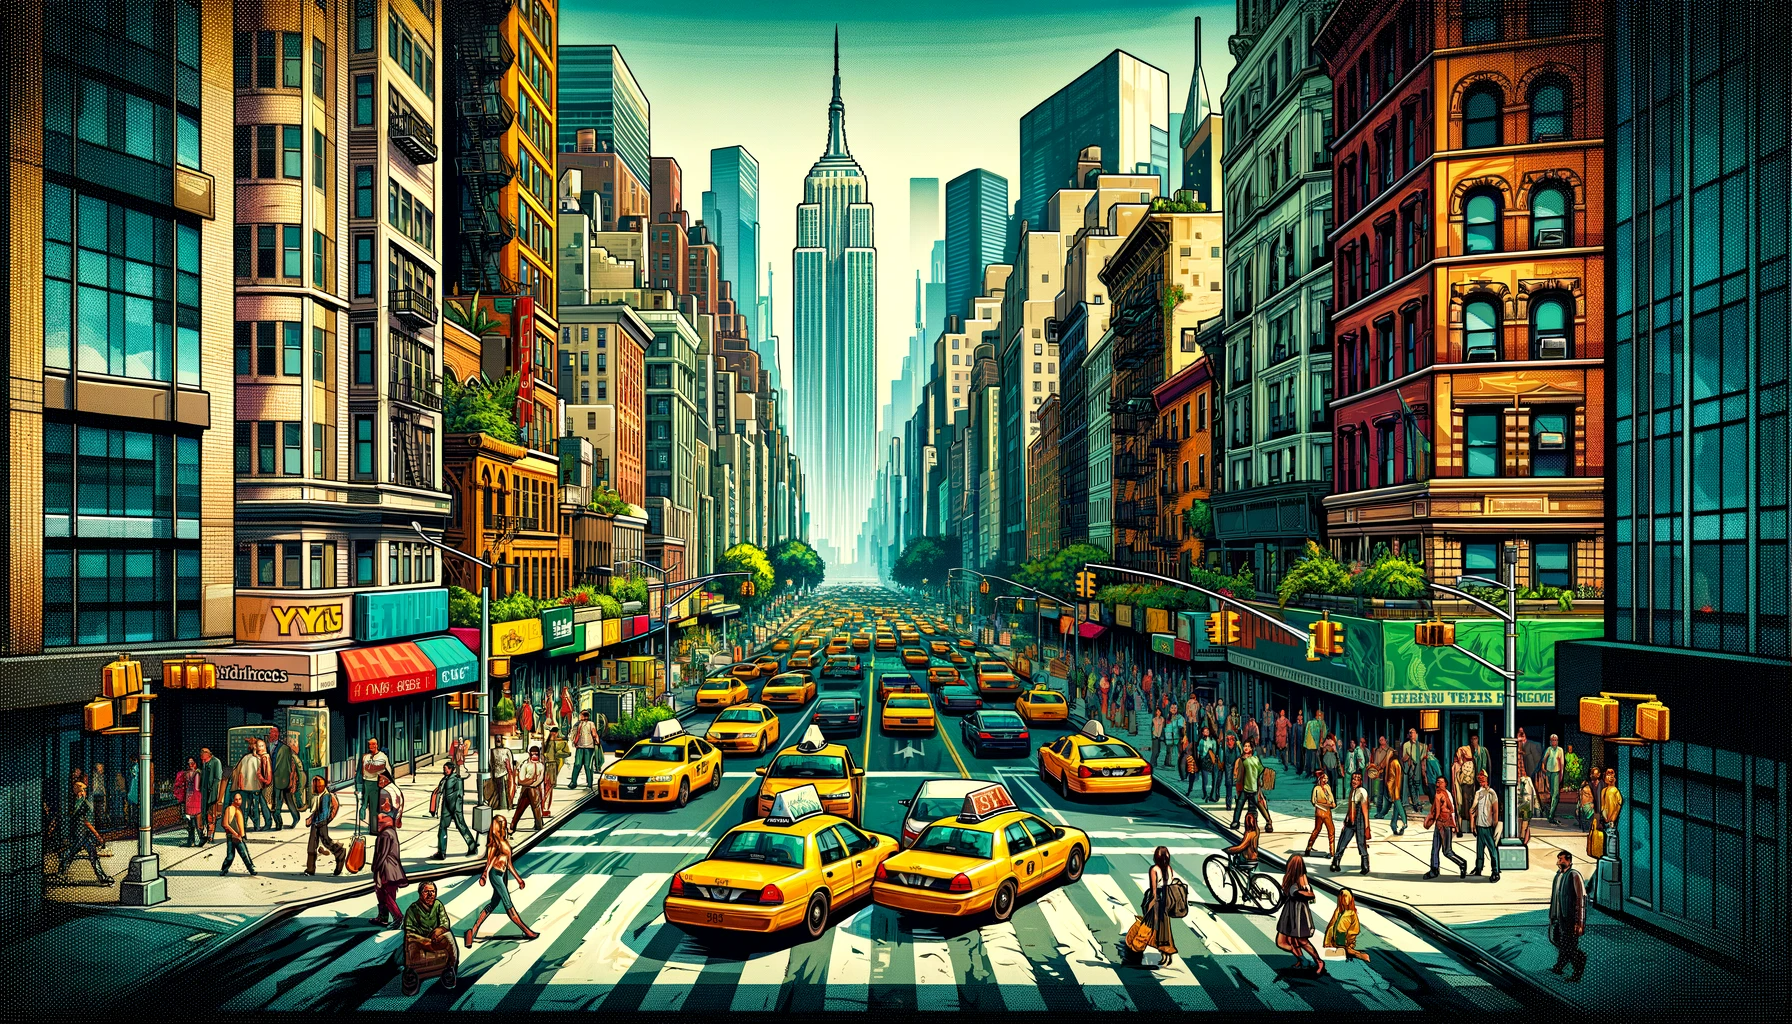

In [445]:
# The code makes sure that once there is change in the 'src/' folder, the 
# change will be automatically reloaded in the notebook.
%reload_ext autoreload
%autoreload 2
%aimport src

In [446]:
import locale

# Set locale to English
locale.setlocale(locale.LC_TIME, 'en_US.UTF-8')

'en_US.UTF-8'

### Task 1: Understanding the Data

Yellow and green taxi trip records include fields capturing 
- pick-up and drop-off dates/times
- pick-up and drop-off locations
- trip distances
- itemized fares
- rate types
- payment types
- driver-reported passenger counts 
  
The data used in the attached datasets were collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers authorized under the Taxicab & Livery Passenger Enhancement Programs (TPEP/LPEP). The trip data was not created by the TLC, and TLC makes no representations as to the accuracy of these data.

**Remark**: Feel free to change the *months* and *year* in the code below, if you need more/less data. 

In [447]:
import pandas as pd
from src.utils import load_data_from_google_drive

# Define the base URLs for the yellow and green taxi data
base_url_yellow = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_{year}-{month}.parquet"
base_url_green = "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_{year}-{month}.parquet"
zones_url = 'https://drive.google.com/file/d/12VgjWXkyEBsxzuKFxIkAevEbao85ei0T/view?usp=sharing'

# Define the months and year you're interested in
months = ['01', '02']
year = '2022'

# Create empty lists to store the dataframes
df_yellow_list = []
df_green_list = []

# Loop over the months
for month in months:
    # Create the full URL for the yellow and green taxi data
    dfy = pd.read_parquet(base_url_yellow.format(year=year, month=month))
    dfg = pd.read_parquet(base_url_green.format(year=year, month=month))
    
    # Download the data and append it to the list
    df_yellow_list.append(dfy)
    df_green_list.append(dfg)

# Concatenate the list of dataframes into a single dataframe
df_yellow = pd.concat(df_yellow_list)
df_green = pd.concat(df_green_list)

df_zones = load_data_from_google_drive(url=zones_url)

In [448]:
# reset index for green and yellow
df_yellow = df_yellow.reset_index(drop=True)
df_green = df_green.reset_index(drop=True)

In [449]:
# remove years that are not 2022 for both green and yellow cabs
df_yellow = df_yellow[df_yellow['tpep_pickup_datetime'].dt.year == 2022]
df_green = df_green[df_green['lpep_pickup_datetime'].dt.year == 2022]

# remove months that are not jan or feb for both green and yellow cabs
df_yellow = df_yellow[(df_yellow['tpep_pickup_datetime'].dt.month == 1) | (df_yellow['tpep_pickup_datetime'].dt.month == 2)]
df_green = df_green[(df_green['lpep_pickup_datetime'].dt.month == 1) | (df_green['lpep_pickup_datetime'].dt.month == 2)]

In [450]:
df_yellow.head(5)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2022-01-01 00:35:40   2022-01-01 00:53:29              2.0   
1         1  2022-01-01 00:33:43   2022-01-01 00:42:07              1.0   
2         2  2022-01-01 00:53:21   2022-01-01 01:02:19              1.0   
3         2  2022-01-01 00:25:21   2022-01-01 00:35:23              1.0   
4         2  2022-01-01 00:36:48   2022-01-01 01:14:20              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           3.80         1.0                  N           142           236   
1           2.10         1.0                  N           236            42   
2           0.97         1.0                  N           166           166   
3           1.09         1.0                  N           114            68   
4           4.30         1.0                  N            68           163   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1         14.5    3.0      0.5        3.65           0.0   
1             1          8.0    0.5      0.5        4.00           0.0   
2             1          7.5    0.5      0.5        1.76           0.0   
3             2          8.0    0.5      0.5        0.00           0.0   
4             1         23.5    0.5      0.5        3.00           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    0.3         21.95                   2.5          0.0  
1                    0.3         13.30                   0.0          0.0  
2                    0.3         10.56                   0.0          0.0  
3                    0.3         11.80                   2.5          0.0  
4                    0.3         30.30                   2.5          0.0

In [451]:
df_green.head(5)

VendorID lpep_pickup_datetime lpep_dropoff_datetime store_and_fwd_flag  \
0         2  2022-01-01 00:14:21   2022-01-01 00:15:33                  N   
1         1  2022-01-01 00:20:55   2022-01-01 00:29:38                  N   
2         1  2022-01-01 00:57:02   2022-01-01 01:13:14                  N   
3         2  2022-01-01 00:07:42   2022-01-01 00:15:57                  N   
4         2  2022-01-01 00:07:50   2022-01-01 00:28:52                  N   

   RatecodeID  PULocationID  DOLocationID  passenger_count  trip_distance  \
0         1.0            42            42              1.0           0.44   
1         1.0           116            41              1.0           2.10   
2         1.0            41           140              1.0           3.70   
3         1.0           181           181              1.0           1.69   
4         1.0            33           170              1.0           6.26   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount ehail_fee  \
0          3.5   0.50      0.5        0.00           0.0      None   
1          9.5   0.50      0.5        0.00           0.0      None   
2         14.5   3.25      0.5        4.60           0.0      None   
3          8.0   0.50      0.5        0.00           0.0      None   
4         22.0   0.50      0.5        5.21           0.0      None   

   improvement_surcharge  total_amount  payment_type  trip_type  \
0                    0.3          4.80           2.0        1.0   
1                    0.3         10.80           2.0        1.0   
2                    0.3         23.15           1.0        1.0   
3                    0.3          9.30           2.0        1.0   
4                    0.3         31.26           1.0        1.0   

   congestion_surcharge  
0                  0.00  
1                  0.00  
2                  2.75  
3                  0.00  
4                  2.75

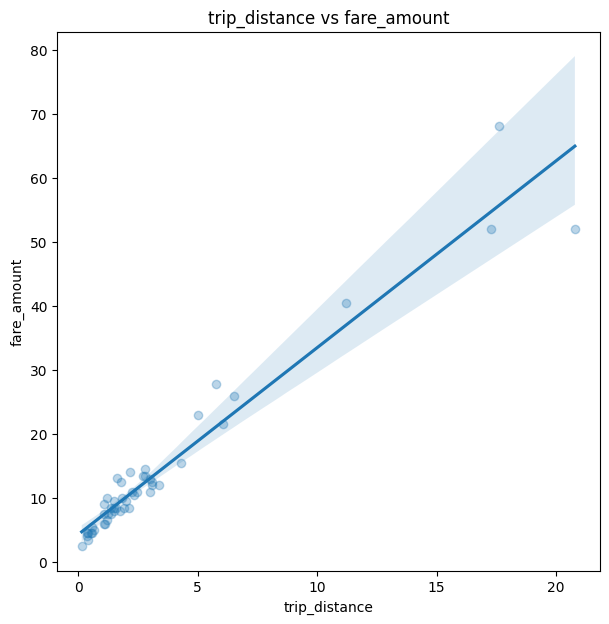

In [452]:
from src.utils import create_scatterplot

create_scatterplot(
    df_yellow.sample(50), 
    x_col = 'trip_distance', 
    y_col = 'fare_amount', 
    title = 'trip_distance vs fare_amount', 
    xlabel = 'trip_distance',
    ylabel = 'fare_amount',
)

### Task 2: Exploratory Data Analysis
Conduct exploratory data analysis to understand the patterns and relationships in the data. This includes analyzing the distribution of trip distances, fares, and passenger counts, as well as the relationship between these variables.

First we will gain an overview of the dataframe

In [453]:
df_yellow.describe()

VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  5.443274e+06                     5443274                     5443274   
mean   1.709104e+00  2022-02-02 02:23:23.842029  2022-02-02 02:38:23.734706   
min    1.000000e+00         2022-01-01 00:00:08         2022-01-01 00:01:42   
25%    1.000000e+00  2022-01-18 23:13:00.250000  2022-01-18 23:27:08.500000   
50%    2.000000e+00  2022-02-03 18:18:29.500000  2022-02-03 18:37:38.500000   
75%    2.000000e+00         2022-02-16 15:01:47         2022-02-16 15:17:56   
max    6.000000e+00         2022-02-28 23:59:51         2022-03-02 21:03:00   
std    5.017386e-01                         NaN                         NaN   

       passenger_count  trip_distance    RatecodeID  PULocationID  \
count     5.270033e+06   5.443274e+06  5.270033e+06  5.443274e+06   
mean      1.390903e+00   5.635183e+00  1.419833e+00  1.657784e+02   
min       0.000000e+00   0.000000e+00  1.000000e+00  1.000000e+00   
25%       1.000000e+00   1.060000e+00  1.000000e+00  1.320000e+02   
50%       1.000000e+00   1.770000e+00  1.000000e+00  1.620000e+02   
75%       1.000000e+00   3.170000e+00  1.000000e+00  2.340000e+02   
max       9.000000e+00   3.487985e+05  9.900000e+01  2.650000e+02   
std       9.835853e-01   6.015361e+02  5.972420e+00  6.554616e+01   

       DOLocationID  payment_type   fare_amount         extra       mta_tax  \
count  5.443274e+06  5.443274e+06  5.443274e+06  5.443274e+06  5.443274e+06   
mean   1.635009e+02  1.183059e+00  1.304499e+01  1.012521e+00  4.916064e-01   
min    1.000000e+00  0.000000e+00 -6.000000e+02 -4.500000e+00 -5.000000e-01   
25%    1.130000e+02  1.000000e+00  6.500000e+00  0.000000e+00  5.000000e-01   
50%    1.620000e+02  1.000000e+00  9.500000e+00  5.000000e-01  5.000000e-01   
75%    2.340000e+02  1.000000e+00  1.400000e+01  2.500000e+00  5.000000e-01   
max    2.650000e+02  5.000000e+00  4.010923e+05  3.350000e+01  1.659000e+01   
std    7.058785e+01  4.975935e-01  1.723421e+02  1.235386e+00  8.213820e-02   

         tip_amount  tolls_amount  improvement_surcharge  total_amount  \
count  5.443274e+06  5.443274e+06           5.443274e+06  5.443274e+06   
mean   2.448718e+00  3.793582e-01           2.967387e-01  1.934912e+01   
min   -1.880000e+02 -3.140000e+01          -3.000000e-01 -6.003000e+02   
25%    1.000000e+00  0.000000e+00           3.000000e-01  1.175000e+01   
50%    2.050000e+00  0.000000e+00           3.000000e-01  1.476000e+01   
75%    3.060000e+00  0.000000e+00           3.000000e-01  2.047000e+01   
max    8.888800e+02  1.933000e+02           3.000000e-01  4.010956e+05   
std    2.808133e+00  1.675421e+00           4.368300e-02  1.725666e+02   

       congestion_surcharge   airport_fee  
count          5.270033e+06  5.270033e+06  
mean           2.295226e+00  7.766223e-02  
min           -2.500000e+00 -1.250000e+00  
25%            2.500000e+00  0.000000e+00  
50%            2.500000e+00  0.000000e+00  
75%            2.500000e+00  0.000000e+00  
max            2.750000e+00  1.250000e+00  
std            7.252293e-01  3.038569e-01

Firstly we check for missing values

In [454]:
# Check for missing values in each column
missing_values = df_yellow.isnull().sum()

# Display columns with missing values
print("Missing values in each feature:")
print(missing_values[missing_values > 0])


Missing values in each feature:
passenger_count         173241
RatecodeID              173241
store_and_fwd_flag      173241
congestion_surcharge    173241
airport_fee             173241
dtype: int64


In [455]:
# Check if the rows with missing values are the same for all listed columns
columns_with_missing = ['passenger_count', 'RatecodeID', 'store_and_fwd_flag', 'congestion_surcharge', 'airport_fee']
same_missing_rows = df_yellow[columns_with_missing].isnull().all(axis=1).sum()

print(f"Number of rows with missing values in all listed columns: {same_missing_rows}")


Number of rows with missing values in all listed columns: 173241


In [456]:
# List of columns with missing values
columns_with_missing = ['passenger_count', 'RatecodeID', 'store_and_fwd_flag', 'congestion_surcharge', 'airport_fee']

# Filter rows with missing values in any of the specified columns
missing_rows = df_yellow[df_yellow[columns_with_missing].isnull().any(axis=1)]

# Display random samples from the filtered rows
print("Random samples from rows with missing values:")
print(missing_rows.sample(5))  # Change the number to display more/less samples


Random samples from rows with missing values:
         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
5405416         2  2022-02-17 22:59:54   2022-02-17 23:23:24              NaN   
5347394         2  2022-02-02 18:33:31   2022-02-02 18:41:10              NaN   
2444572         1  2022-01-26 17:06:25   2022-01-26 17:14:35              NaN   
5353335         2  2022-02-04 08:11:38   2022-02-04 08:24:04              NaN   
2412763         1  2022-01-13 07:38:45   2022-01-13 07:55:59              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
5405416           8.74         NaN               None           231   
5347394           1.15         NaN               None            13   
2444572           1.30         NaN               None           100   
5353335           2.10         NaN               None           238   
2412763           2.40         NaN               None           143   

         DOLocationID  payment_type  far

In [457]:
# removing if more than 4 passangers (which is maximum according to NYC law)
df_yellow = df_yellow[df_yellow['passenger_count'] < 5]
df_green = df_green[df_green['passenger_count'] < 5]

We can conlude that the missing values of each feature occurs in the same rows. Therefore we might say that we have 173.241 rides/data entries of bad quality. We wish to drop these rows

In [458]:
# List of columns with missing values
columns_with_missing = ['passenger_count', 'RatecodeID', 'store_and_fwd_flag', 'congestion_surcharge', 'airport_fee']

# Drop rows where any of the specified columns have missing values
df_yellow_cleaned = df_yellow.dropna(subset=columns_with_missing)

# Print the shape of the cleaned DataFrame
print(f"Original DataFrame shape: {df_yellow.shape}")
print(f"Cleaned DataFrame shape: {df_yellow_cleaned.shape}")


Original DataFrame shape: (5086913, 19)
Cleaned DataFrame shape: (5086913, 19)


Pay attention to the trip distance (and maybe also fare amount). Are there outliers? Should some data (that looks apparently not practical) be dropped?

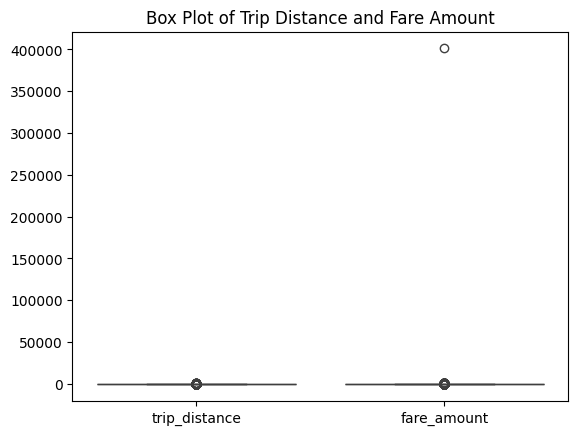

In [459]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot for both features
sns.boxplot(data=df_yellow_cleaned[['trip_distance', 'fare_amount']])

# Add a title
plt.title('Box Plot of Trip Distance and Fare Amount')

# Show the plot
plt.show()


We see a significant outlier in fare_amount. 400k USD is impossible, so we wish to drop this row and create updated boxplots.

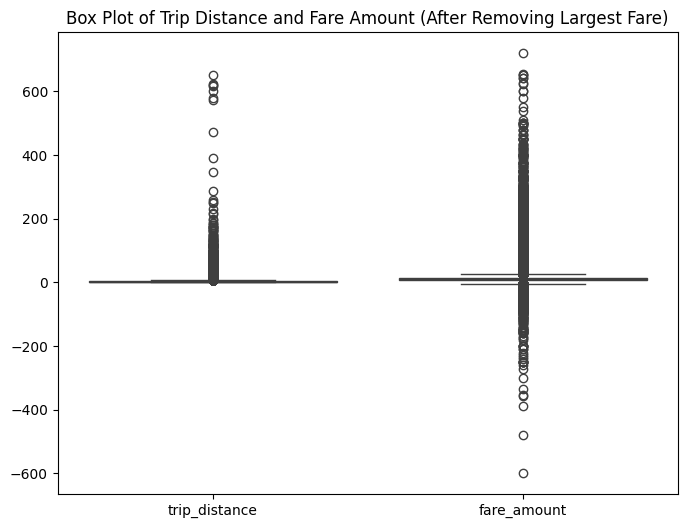

In [460]:
import seaborn as sns
import matplotlib.pyplot as plt

# Remove the row with the largest fare amount
df_yellow_filtered = df_yellow_cleaned[df_yellow_cleaned['fare_amount'] != df_yellow_cleaned['fare_amount'].max()]

# Create a new box plot without the largest fare amount
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_yellow_filtered[['trip_distance', 'fare_amount']])
plt.title('Box Plot of Trip Distance and Fare Amount (After Removing Largest Fare)')
plt.show()


Negative fare amounts make no sense. Let's remove all rows with fare_amount<0 and show the updated boxplots

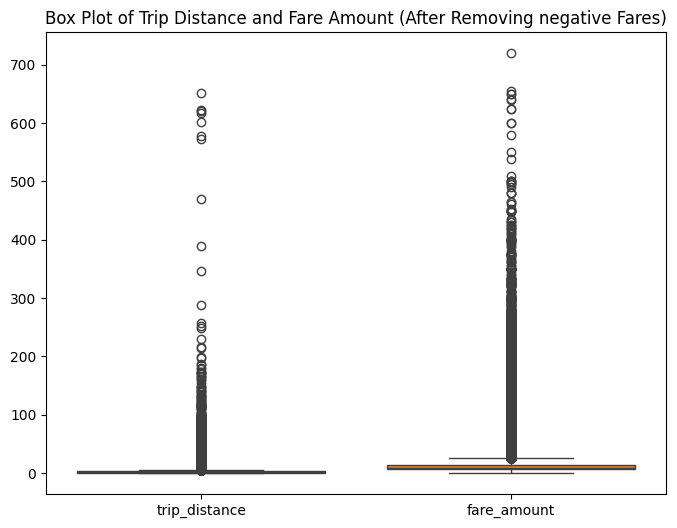

In [461]:
# Drop rows where fare_amount is less than 0
df_yellow_1 = df_yellow_filtered[df_yellow_filtered['fare_amount'] >= 0]

# Create a new box plot without data entries of fare_amount>=0
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_yellow_1[['trip_distance', 'fare_amount']])
plt.title('Box Plot of Trip Distance and Fare Amount (After Removing negative Fares)')
plt.show()


The data is highly skewed still. Let's look at a histogram for better visibility in data distribution. And lets add other selected features; passenger count and tip amount

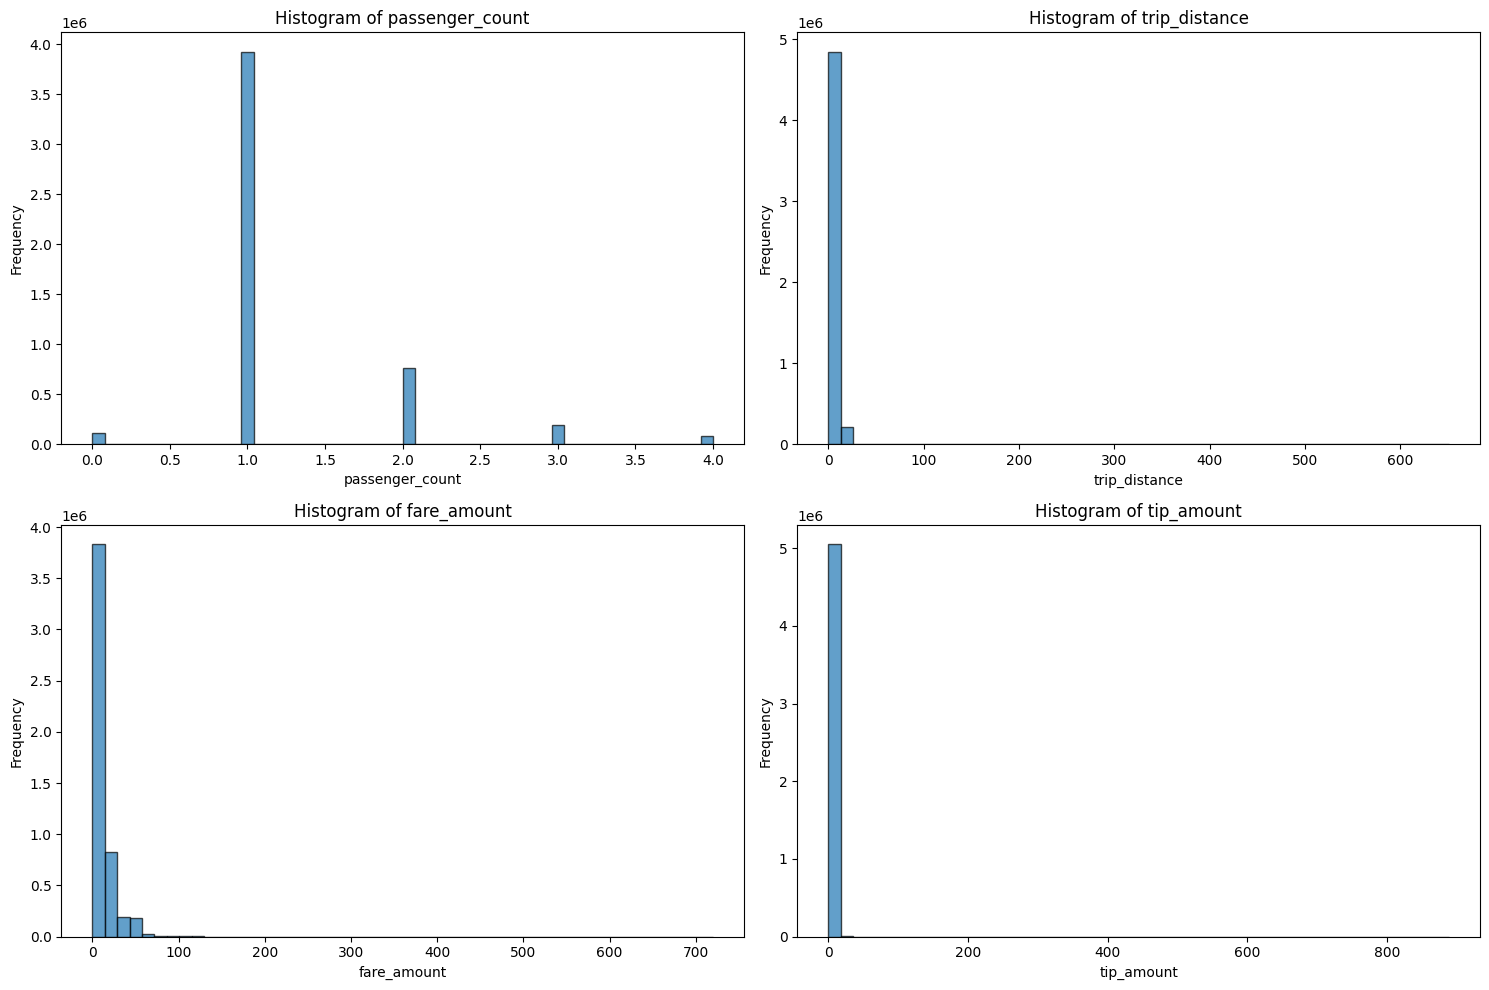

In [462]:
import matplotlib.pyplot as plt

# List of features to plot
features = ['passenger_count', 'trip_distance', 'fare_amount', 'tip_amount']

# Create subplots: 2 rows, 2 columns
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot histograms for each feature
for i, feature in enumerate(features):
    row = i // 2  # Determine the row index (integer division by 2)
    col = i % 2   # Determine the column index (remainder when divided by 2)
    axes[row, col].hist(df_yellow_1[feature], bins=50, edgecolor='black', alpha=0.7)
    axes[row, col].set_title(f'Histogram of {feature}')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


Now let's log transform the features to reduce skewness. This spreads out smaller values, compresses larger ones - making distributions easier to visually interpret. Also we adjust bins on the passenger count for better visibility. We will also remove trips where there's no passenger.

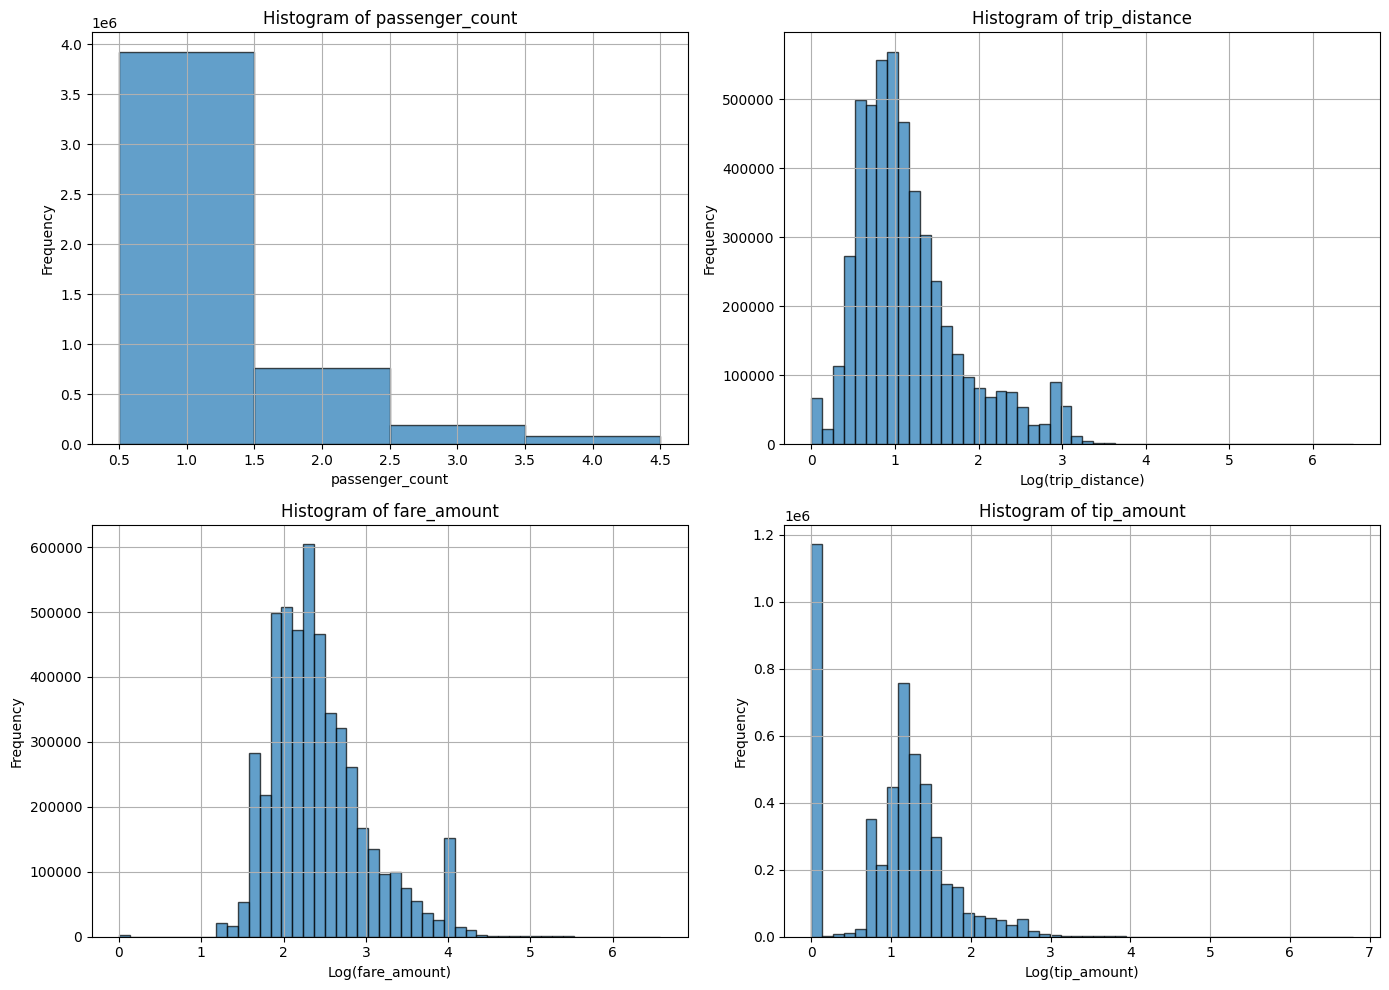

In [463]:
import matplotlib.pyplot as plt
import numpy as np

# Remove rows where passenger_count is below 1
df_yellow_1 = df_yellow_1[df_yellow_1['passenger_count'] >= 1]

# List of features to plot
features = ['passenger_count', 'trip_distance', 'fare_amount', 'tip_amount']

# Create subplots: 2 rows, 2 columns
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot histograms for each feature
for i, feature in enumerate(features):
    row = i // 2  # Determine the row index (integer division by 2)
    col = i % 2   # Determine the column index (remainder when divided by 2)
    
    if feature == 'passenger_count':
        # Define bins to perfectly align with discrete values of passenger_count
        bins = np.arange(df_yellow_1['passenger_count'].min(), df_yellow_1['passenger_count'].max() + 2) - 0.5
        axes[row, col].hist(df_yellow_1[feature], bins=bins, edgecolor='black', alpha=0.7)
        axes[row, col].set_xlabel(feature)
    else:
        # Apply log transformation for other features
        log_data = np.log1p(df_yellow_1[feature])  # Apply log(1 + x) transformation
        axes[row, col].hist(log_data, bins=50, edgecolor='black', alpha=0.7)
        axes[row, col].set_xlabel(f'Log({feature})')
    
    axes[row, col].set_title(f'Histogram of {feature}')
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].grid(True)  # Add gridlines

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()


The data shows typical behavior for taxi trips, with most trips being short, involving 1 passenger, and having low to moderate fares and tips.

Let's have a look at the correlation between the selected features

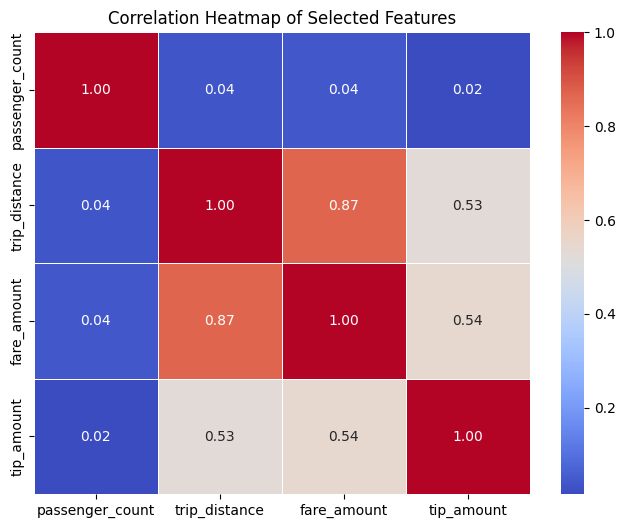

In [464]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of features to include in the correlation heatmap
features = ['passenger_count', 'trip_distance', 'fare_amount', 'tip_amount']

# Compute correlation matrix for the selected features
corr_matrix = df_yellow_1[features].corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set title
plt.title('Correlation Heatmap of Selected Features')

# Show plot
plt.show()


Strong correlation between fare amount and trip distance. Expected and intuitive: Longer rides = larger fares

Some correlation between tip amount and fare amount. Also expected and intuitive: Larger fares = larger tips

**Textbook Practice**:
Apply the principle of "choosing an effective visual" in Chapter 2 to make the visualization. Explain how this principle is applied.

We will apply principles of "Storytelling with Data" on the heatmap showing correlations between features.

The current heatmap uses a gradient with strong contrasts for low correlations (blue) and high correlations (red). To reduce as much visual noise as possible, and draw attention to the important relationships (like the trip distance and fare amount), we want to use a subtler color palette.

We also want to simplify labels and titles, making them more readable.

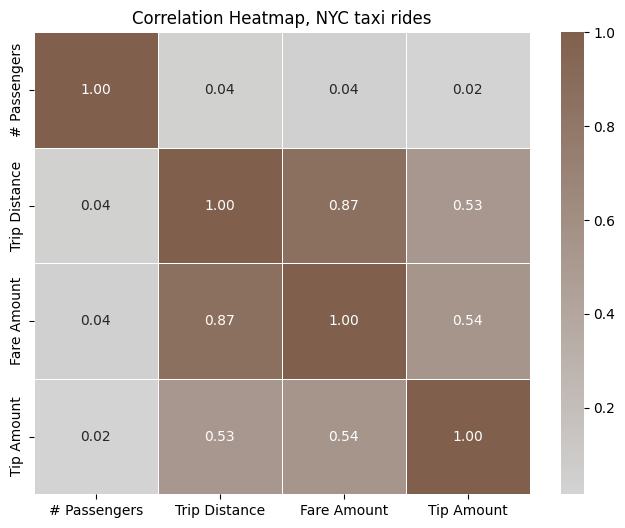

In [465]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns

# List of features to include in the correlation heatmap
features = ['passenger_count', 'trip_distance', 'fare_amount', 'tip_amount']

# Compute correlation matrix for the selected features
corr_matrix = df_yellow_1[features].corr()

# Create a heatmap for the correlation matrix
plt.figure(figsize=(8, 6))
custom_cmap = LinearSegmentedColormap.from_list("custom", ["#d3d3d3","#80604d"])
custom_labels = ['# Passengers', 'Trip Distance', 'Fare Amount', 'Tip Amount']
sns.heatmap(corr_matrix, annot=True, cmap=custom_cmap, fmt='.2f', linewidths=0.5, 
            xticklabels=custom_labels, yticklabels=custom_labels)

# Set title
plt.title('Correlation Heatmap, NYC taxi rides')

# Show plot
plt.show()


### Task 3: Spatial Analysis
Use Kepler.gl (https://kepler.gl/) or similar tools/packages to visualize the spatial patterns of taxi rides. This includes the pickup and dropoff locations, as well as the routes taken. Analyze the spatial patterns to identify hotspots of taxi demand.

You can find a good tutorial on https://docs.kepler.gl/docs/keplergl-jupyter#install for how to use it in jupyter notebook with python.

**Hint** In order to visualize the pickup/dropoff location geographically, you might need to know the latitude (lat) and longitude (lng) for each location. You can find the corresponding information in the dataframe "df_zones".

**Important** Try **NOT** to load too many data to kepler, as it cannot handle many data at one time. Try visualize the pattern for just 1-2 hours first.

In [466]:
# Removing duplicates by keeping the first occurrence
df_zones = df_zones.drop_duplicates(subset='LocationID', keep='first')

# Defining start and end time
start_time = '2022-01-07 07:00:00'
end_time = '2022-01-07 09:00:00'

# Choosing relevant columns
chosen_columns = [
    'tpep_pickup_datetime',
    'tpep_dropoff_datetime',
    'PULocationID',
    'DOLocationID',
    'fare_amount'
]

# Filtering dataframe to only show data in the chosen timeframe
df_yellow_spatial = df_yellow_1[
    (df_yellow_1['tpep_pickup_datetime'] >= start_time) &
    (df_yellow_1['tpep_pickup_datetime'] <= end_time) 
][chosen_columns]

# Joins yellowcab dataframe pickup locations with the zones
pickup_locations = df_yellow_spatial.join(
    df_zones.set_index('LocationID'), on="PULocationID", how='left'
)

# Renaming features so pickup/dropoff coordinates can be distinguished from eachother
pickup_locations = pickup_locations.rename(
    {'lat': 'pickup_lat', 'lng': 'pickup_lng'}, axis=1
)[['pickup_lat', 'pickup_lng']]

#Same now for dropoff
dropoff_locations = df_yellow_spatial.join(
    df_zones.set_index('LocationID'), on="DOLocationID", how='left'
)

dropoff_locations = dropoff_locations.rename(
    {'lat': 'dropoff_lat', 'lng': 'dropoff_lng'}, axis=1
)[['dropoff_lat', 'dropoff_lng']]

for col in pickup_locations.columns:
    df_yellow_spatial[col] = pickup_locations[col]

for col in dropoff_locations.columns:
    df_yellow_spatial[col] = dropoff_locations[col]



In [467]:
from IPython.display import Video
#Video("yellowcab.mp4")

From this kepler geospatial animation we find 3 hotspots except at around 8am, most likely due to morning traffic in NYC.

We wish to approximate the center of each locations of the hotspots using k-means clustering

c:\Users\mjagd\anaconda3\envs\dviz\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


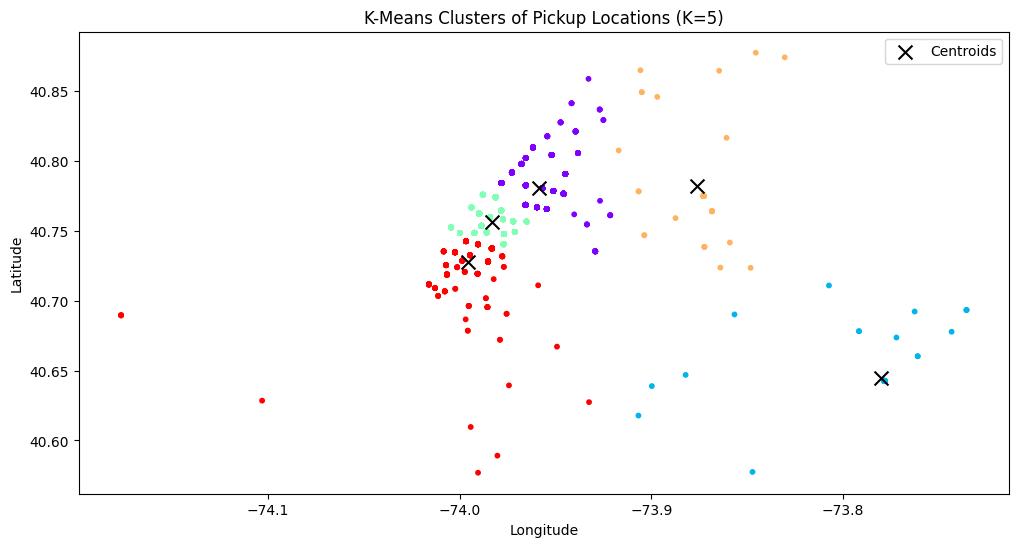

In [468]:
from sklearn.cluster import KMeans

# Load the dataset (assuming it's already loaded as a DataFrame)
# df = pd.read_csv("path_to_your_file.csv")

# Extract pickup coordinates
pickup_points = df_yellow_spatial[['pickup_lat', 'pickup_lng']].dropna().values

# Define the number of clusters
num_clusters = 5

# Apply K-Means clustering to pickup points
kmeans_pickup = KMeans(n_clusters=num_clusters, random_state=42).fit(pickup_points)
pickup_cluster_labels = kmeans_pickup.labels_

# Plotting K-Means clusters for pickups
plt.figure(figsize=(12, 6))
plt.scatter(pickup_points[:, 1], pickup_points[:, 0], c=pickup_cluster_labels, cmap='rainbow', s=10)
plt.scatter(kmeans_pickup.cluster_centers_[:, 1], kmeans_pickup.cluster_centers_[:, 0], color='black', marker='x', s=100, label='Centroids')
plt.title(f"K-Means Clusters of Pickup Locations (K={num_clusters})")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()

We wish to find coordinates for the three centroids/hotspots that we see in the kepler visual. It must be the three centroid with longitude smaller than -73.9

In [469]:
# Filter and get centroid coordinates as strings for longitudes greater than -73.9
centroid_strings = [
    f"(Latitude: {lat}, Longitude: {lng})"
    for lat, lng in kmeans_pickup.cluster_centers_
    if lng < -73.9
]

# Print the filtered centroid coordinates
print("Centroid Coordinates:")
print("\n".join(centroid_strings))


Centroid Coordinates:
(Latitude: 40.780274769058025, Longitude: -73.95867477106734)
(Latitude: 40.756024132209234, Longitude: -73.98303092164946)
(Latitude: 40.72745260454945, Longitude: -73.99548022311706)


Let's find out where this is

In [470]:
from IPython.display import Image
#Image("centroids.png")

Here we would recommend to further calculate density based on fare amount and amount of trips to make a strategy for distributing taxis on the hotspots

**Textbook Practice**: Apply the principle "focus your audience's attention" in Chapter 4. Explain briefly how you expect your visualization captures your audience's attention.

Here I have made a bar chart showing the feature pair correlation. The title, "Key Correlations in NYC Taxi Data", immediately informs the audience about the insight they will gain. The dark red highlight on the strongest correlation (Trip Distance - Fare Amount) draws immediate attention. Muted grey bars for other correlations ensure the audience isn’t distracted by less important data.

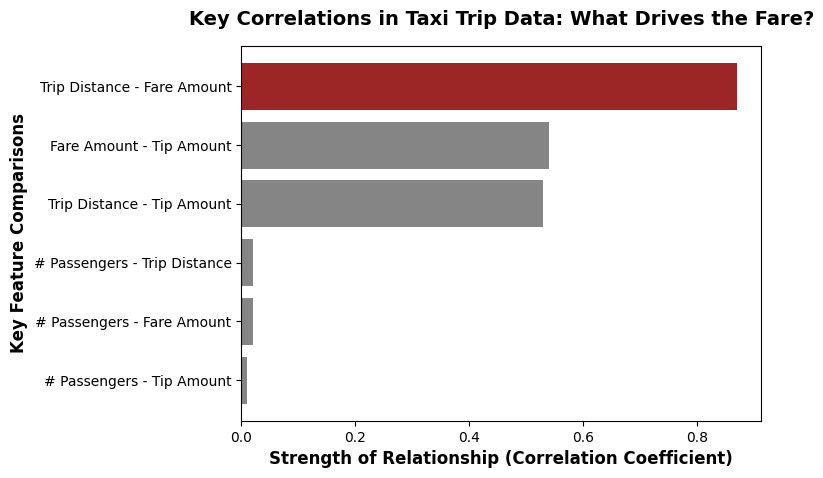

In [471]:
import matplotlib.pyplot as plt

# Define data
feature_pairs = [
    "Trip Distance - Fare Amount",
    "Fare Amount - Tip Amount",
    "Trip Distance - Tip Amount",
    "# Passengers - Trip Distance",
    "# Passengers - Fare Amount",
    "# Passengers - Tip Amount"
]

correlation_values = [0.87, 0.54, 0.53, 0.02, 0.02, 0.01]

# Define colors: highlight the strongest correlation in dark red, others in muted grey
highlight_color = "darkred"
muted_color = "#707070"  # Darker grey for better contrast
colors = [muted_color] * len(feature_pairs)
colors[0] = highlight_color  # Highlight the largest correlation

# Create the bar chart
fig, ax = plt.subplots(figsize=(8, 5))

bars = ax.barh(feature_pairs, correlation_values, color=colors, alpha=0.85)

# Add labels and title
ax.set_xlabel("Strength of Relationship (Correlation Coefficient)", fontsize=12, fontweight="bold")
ax.set_ylabel("Key Feature Comparisons", fontsize=12, fontweight="bold")
ax.set_title("Key Correlations in Taxi Trip Data: What Drives the Fare?", fontsize=14, fontweight="bold", pad=15)

# Adjust spacing to prevent text overlap
plt.subplots_adjust(left=0.3, right=0.95, top=0.9, bottom=0.15)

# Invert y-axis for better readability
ax.invert_yaxis()

# Show the chart
plt.show()


### Task 4: Temporal Analysis
Analyze the temporal patterns of taxi rides. This includes the number of rides by time of day, day of the week, and month of the year. Also, analyze the relationship between temporal patterns and other variables, such as trip distance and fare.

You can find very good code examples to use on this page https://www.machinelearningplus.com/time-series/time-series-analysis-python/?utm_content=cmp-true

#### Our solving of task 4 begins here:
We imagine that we are tasked with planning and allocating taxis in NYC. To achieve this, we have conducted statistical analyses using data from January and February 2022. The limited timeframe is due to the short deadline for this project.

To provide recommendations on when to allocate more or fewer taxis, we have analyzed which days and times are the busiest.
_____________________________________________

First, we add two new columns, one for the name of the week, and the second for if the day is a weekday or weekend. By doing this first, it is easier to analyse and work with the data.

In [472]:
def add_weekday_and_weekend(df, date_column):
    # Ensure the date_column is in datetime format
    df[date_column] = pd.to_datetime(df[date_column])

    # Determine the weekday as a number (Monday=0, Sunday=6), and shift to match Saturday as 1st of January
    df['weekday'] = (df[date_column].dt.dayofweek + 1) % 7

    # Map weekdays to names
    weekdays = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
    df['weekday'] = df['weekday'].map(weekdays)

    # Add a column indicating whether it's weekend or weekday
    # Weekend = Saturday and Sunday
    df['weekend_weekday'] = df['weekday'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

    return df

# Example usage:
df_yellow_1 = add_weekday_and_weekend(df_yellow_1, 'tpep_pickup_datetime')

Now, we want to analyze the number of trips according to the hour of the day.

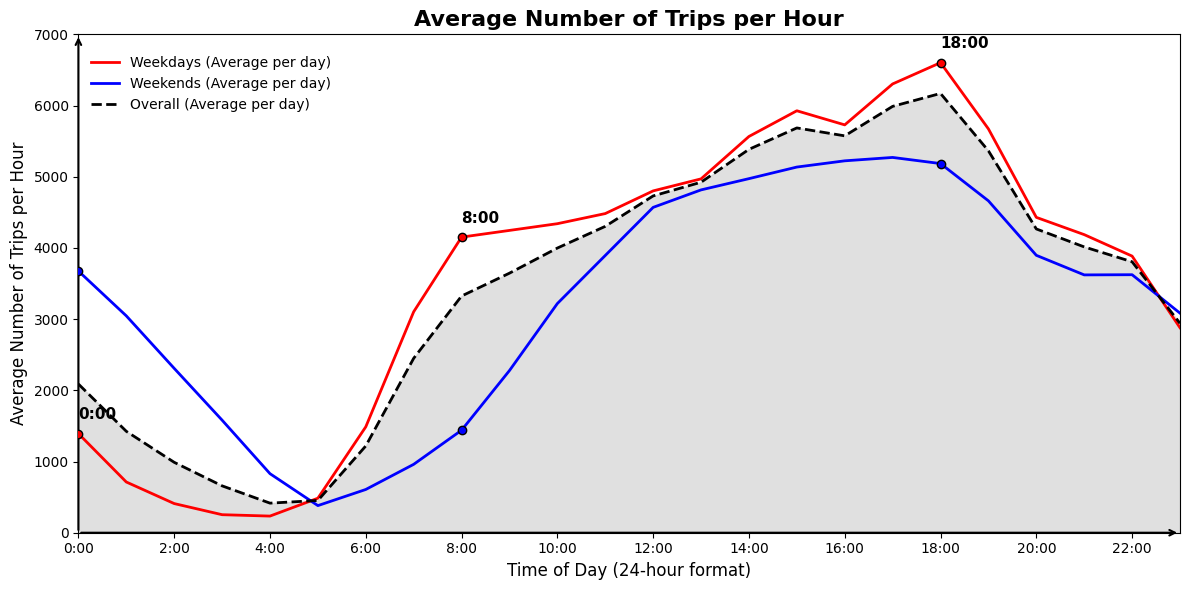

In [473]:
# Create 'hour' column based on tpep_pickup_datetime
df_yellow_1['hour'] = df_yellow_1['tpep_pickup_datetime'].dt.hour

# Calculate the average number of trips per hour
general_values = df_yellow_1.groupby('hour').size() / df_yellow_1['tpep_pickup_datetime'].dt.date.nunique()

# Calculate the average number of trips for weekdays
weekday_values = (
    df_yellow_1[df_yellow_1['weekend_weekday'] == 'Weekday'].groupby('hour').size()
    / df_yellow_1[df_yellow_1['weekend_weekday'] == 'Weekday']['tpep_pickup_datetime'].dt.date.nunique()
)

# Calculate the average number of trips for weekends
weekend_values = (
    df_yellow_1[df_yellow_1['weekend_weekday'] == 'Weekend'].groupby('hour').size()
    / df_yellow_1[df_yellow_1['weekend_weekday'] == 'Weekend']['tpep_pickup_datetime'].dt.date.nunique()
)

# Create a plot
fig, ax = plt.subplots(figsize=(12, 6))

# Fill the area under the black line with a very light gray color
ax.fill_between(range(24), 0, general_values, color='lightgray', alpha=0.7)

# Plot the data
ax.plot(range(24), weekday_values, label='Weekdays (Average per day)', linewidth=2, color='red')
ax.plot(range(24), weekend_values, label='Weekends (Average per day)', linewidth=2, color='blue')
ax.plot(range(24), general_values, label='Overall (Average per day)', linewidth=2, color='black', linestyle='--')

# Add points and annotate the time for the red and blue lines at 0:00, 8:00, and 18:00
highlight_hours = [0, 8, 18]
for hour in highlight_hours:
    # Add points
    ax.scatter(hour, weekday_values[hour], color='red', edgecolor='black', zorder=5)
    ax.scatter(hour, weekend_values[hour], color='blue', edgecolor='black', zorder=5)
    
    # Annotate time at the points
    ax.text(hour, weekday_values[hour] + 200, f"{hour}:00", color='black', fontsize=11, ha='left', fontweight='bold')

# Add x- and y-axis ticks and labels
ax.set_xticks(range(0, 24, 2))
ax.set_xticklabels([f"{h}:00" for h in range(0, 24, 2)], fontsize=10)
ax.set_yticks(ax.get_yticks())
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Time of Day (24-hour format)', fontsize=12)
ax.set_ylabel('Average Number of Trips per Hour', fontsize=12)

# Set x- and y-axis limits
ax.set_xlim(0, 23)
ax.set_ylim(0, None)

# Add title and legend
ax.set_title('Average Number of Trips per Hour', fontsize=16, fontweight='bold')
ax.legend(fontsize=10, loc='center left', bbox_to_anchor=(0.0, 0.9), frameon=False)

# Remove grid and background
ax.set_facecolor('white')
ax.grid(False)

# Add arrows to the x-axis and y-axis
ax.annotate('', xy=(1, 0), xytext=(0, 0),
            xycoords='axes fraction', textcoords='axes fraction',
            arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))

ax.annotate('', xy=(0, 1), xytext=(0, 0),
            xycoords='axes fraction', textcoords='axes fraction',
            arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))

# Finalize and show the plot
plt.tight_layout()
plt.show()


The figure reveals a general trend where the number of taxi trips increases throughout the day, reaching its highest point around 6 PM. Additionally, it is clear that there are more trips at night during weekends compared to weekdays, while weekday mornings see more trips earlier in the day. This pattern might be explained by people going out more during the weekends and sleeping in later.

This means that fewer taxis are needed during nighttime hours, especially on weekdays. On the other hand, there is a greater demand for taxis on weekday mornings. Overall, the busiest period typically falls between 10 AM and 10 PM, where additional taxis are required to meet demand.

Now, we want to find out, if there are more trips on certain days of the week and if there is a difference between January and February

Total rows in dataset: 4945069
Total trips by day of week:
 day_of_week
0    693346
1    667129
2    693162
3    735324
4    747097
5    759477
6    649534
dtype: int64
Number of unique days: 7
Average trips by day of week:
 day_of_week
0     99049.428571
1     95304.142857
2     99023.142857
3    105046.285714
4    106728.142857
5    108496.714286
6     92790.571429
dtype: float64
Overall average trips per day: 100919.7755102041


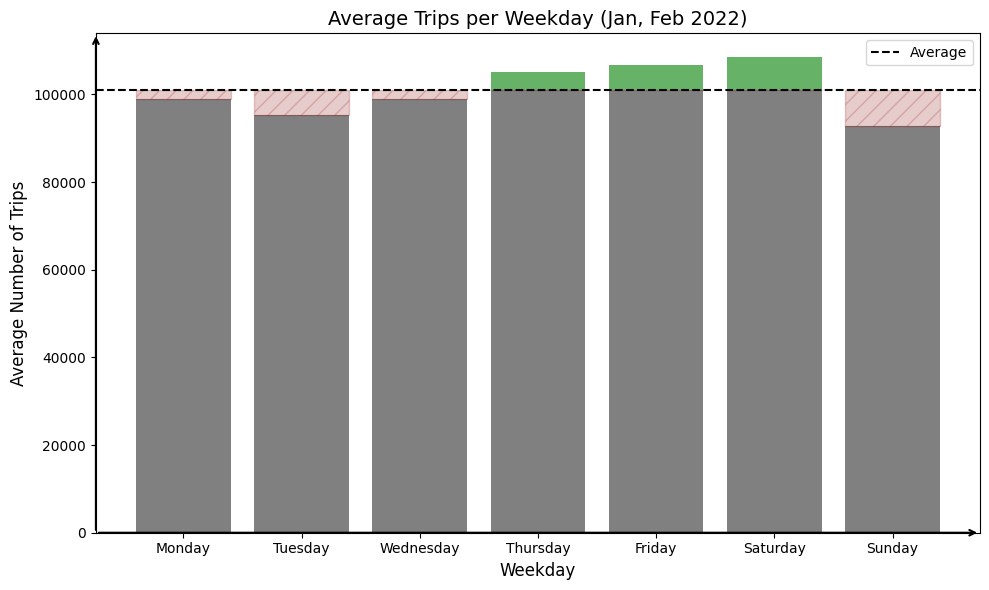

In [474]:
# Ensure that the 'tpep_pickup_datetime' column is in datetime format
df_yellow_1['tpep_pickup_datetime'] = pd.to_datetime(df_yellow_1['tpep_pickup_datetime'], errors='coerce')

# Debug 1: Kontrollér det samlede antal rækker
total_rows = len(df_yellow_1)
print(f"Total rows in dataset: {total_rows}")

# Extract the day of the week if it doesn't already exist
if 'day_of_week' not in df_yellow_1.columns:
    df_yellow_1['day_of_week'] = df_yellow_1['tpep_pickup_datetime'].dt.dayofweek

# Debug 2: Kontrollér antallet af ture pr. dag af ugen
total_trips_by_day = df_yellow_1.groupby('day_of_week').size()
print("Total trips by day of week:\n", total_trips_by_day)

# Calculate the number of unique days in the dataset
unique_days = 7
print(f"Number of unique days: {unique_days}")

# Calculate the corrected average trips per day of the week
average_data_counts = total_trips_by_day / unique_days

# Debug 3: Kontrollér gennemsnittet pr. dag
print("Average trips by day of week:\n", average_data_counts)

# Convert days from numbers to names
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
average_data_counts.index = [day_names[day] for day in average_data_counts.index]

# Calculate the overall average (corrected)
overall_average = average_data_counts.mean()
print(f"Overall average trips per day: {overall_average}")

# Plotting (unchanged logic)
fig, ax = plt.subplots(figsize=(10, 6))

# Add arrows to the x-axis and y-axis
ax.annotate('', xy=(1, 0), xytext=(0, 0),
            xycoords='axes fraction', textcoords='axes fraction',
            arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))

ax.annotate('', xy=(0, 1), xytext=(0, 0),
            xycoords='axes fraction', textcoords='axes fraction',
            arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))

# Plot the gray portion of the bars
bars_gray = ax.bar(
    average_data_counts.index,
    [min(value, overall_average) for value in average_data_counts.values],
    color='gray',
    edgecolor='none'
)

# Plot the green portion of the bars (with stippling)
bars_green = ax.bar(
    average_data_counts.index,
    [max(0, overall_average - value) for value in average_data_counts.values],
    bottom=[min(value, overall_average) for value in average_data_counts.values],
    color='white',
    edgecolor='none',
    alpha=0.7
)

for i, bar in enumerate(bars_green):
    x = bar.get_x()
    width = bar.get_width()
    y = bar.get_y()
    height = bar.get_height()
    ax.fill_betweenx(
        [y, y + height],
        x,
        x + width,
        color="darkred",
        alpha=0.2,
        hatch='//'
    )

# Plot the red portion of the bars
bars_red = ax.bar(
    average_data_counts.index,
    [max(0, value - overall_average) for value in average_data_counts.values],
    bottom=[min(value, overall_average) for value in average_data_counts.values],
    color='green',
    alpha=0.6,
    edgecolor='none'
)

# Draw the average line
ax.axhline(y=overall_average, color='black', linestyle='--', linewidth=1.5, label=f'Average')

# Remove grid and background
ax.set_facecolor('white')
ax.grid(False)

# Add titles and labels
plt.title('Average Trips per Weekday (Jan, Feb 2022)', fontsize=14)
plt.xlabel('Weekday', fontsize=12)
plt.ylabel('Average Number of Trips', fontsize=12)

# Add legend
ax.legend()

# Show plot
plt.tight_layout()
plt.show()


There is a general trend of increased taxi rides on Thursday, Friday, and Saturday, which may indicate that people are more active and out on these days. Sunday, on the other hand, sees the fewest taxi rides, while Monday, Tuesday, and Wednesday all fall a bit below the average.

Based on this pattern, it might be worth considering adjusting taxi availability accordingly: aligning it with the average demand from Monday to Wednesday, increasing the allocation for Thursday through Saturday, and reducing availability below the average on Sundays.

As we do not want to assume that the number of trips is evenly distributed across all months, we will double-check whether there are fewer or more trips in February compared to January. For instance, there generally tend to be more taxi trips on rainy or snowy days (winter) compared to warmer months.

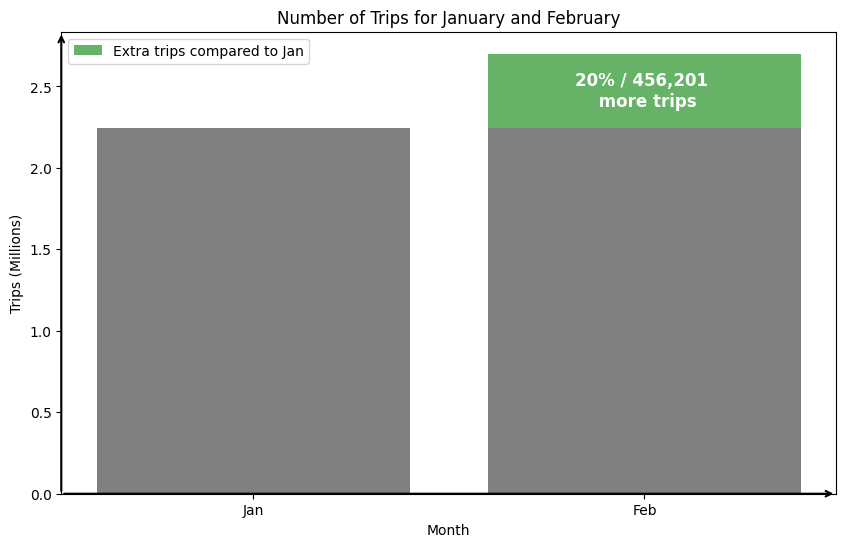

In [475]:
from matplotlib.ticker import FuncFormatter

# Filtrer taxiture for januar og februar
january_trips = df_yellow_1[df_yellow_1['tpep_pickup_datetime'].dt.month == 1]
february_trips = df_yellow_1[df_yellow_1['tpep_pickup_datetime'].dt.month == 2]

# Tæl antallet af ture for januar og februar
january_count = len(january_trips)
february_count = len(february_trips)

# Calculate percentage increase and extra trips
if february_count > january_count:
    extra_trips = february_count - january_count
    percentage_increase = (extra_trips / january_count) * 100

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Add arrows to the x-axis and y-axis
ax.annotate('', xy=(1, 0), xytext=(0, 0),
            xycoords='axes fraction', textcoords='axes fraction',
            arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))

ax.annotate('', xy=(0, 1), xytext=(0, 0),
            xycoords='axes fraction', textcoords='axes fraction',
            arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))

# Remove grid and background
ax.set_facecolor('white')
ax.grid(False)

# Create bar plot
bar_width = 0.4  # Reduce bar width
bar_positions = [1.5, 2.0]  # Closer positions for bars

# January bar
plt.bar(bar_positions[0], january_count, color='gray', width=bar_width)

# February bar
if february_count > january_count:
    # Plot the portion equal to January
    plt.bar(bar_positions[1], january_count, color='gray', width=bar_width)
    # Plot the portion exceeding January in green
    plt.bar(bar_positions[1], february_count - january_count, bottom=january_count, color='green', alpha=0.6, width=bar_width, label='Extra trips compared to Jan')
    
    # Add percentage and extra trips text in the green portion
    ax.text(bar_positions[1], january_count + (february_count - january_count) / 2,  # Position: middle of green section
            f'{percentage_increase:.0f}% / {extra_trips:,} \n more trips',  # Text with 0 decimals place and formatted number
            ha='center', va='center', color='white', fontsize=12, weight='bold')
else:
    # Entire February bar is gray if not greater than January
    plt.bar(bar_positions[1], february_count, color='blue', width=bar_width)

# Title and labels
plt.title('Number of Trips for January and February')
plt.xlabel('Month')
plt.ylabel('Trips (Millions)')  # Change y-axis label
plt.xticks(bar_positions, labels=["Jan", "Feb"])  # Adjust tick positions for closer bars
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1e6:.1f}'))  # Format y-axis as "Millions"

# Add legend
plt.legend()

# Show plot
plt.show()


There are more trips in February than i January. It should also be noted that there are 4 fewer days in February, meaning that the difference is rather great.

Lets find out if this is due to Valentines day the 14th February. To do this, we will calculate the average trips on other mondays compared to monday the 14th

C:\Users\mjagd\AppData\Local\Temp\ipykernel_14564\3332898492.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  february_data['date'] = february_data['tpep_pickup_datetime'].dt.date


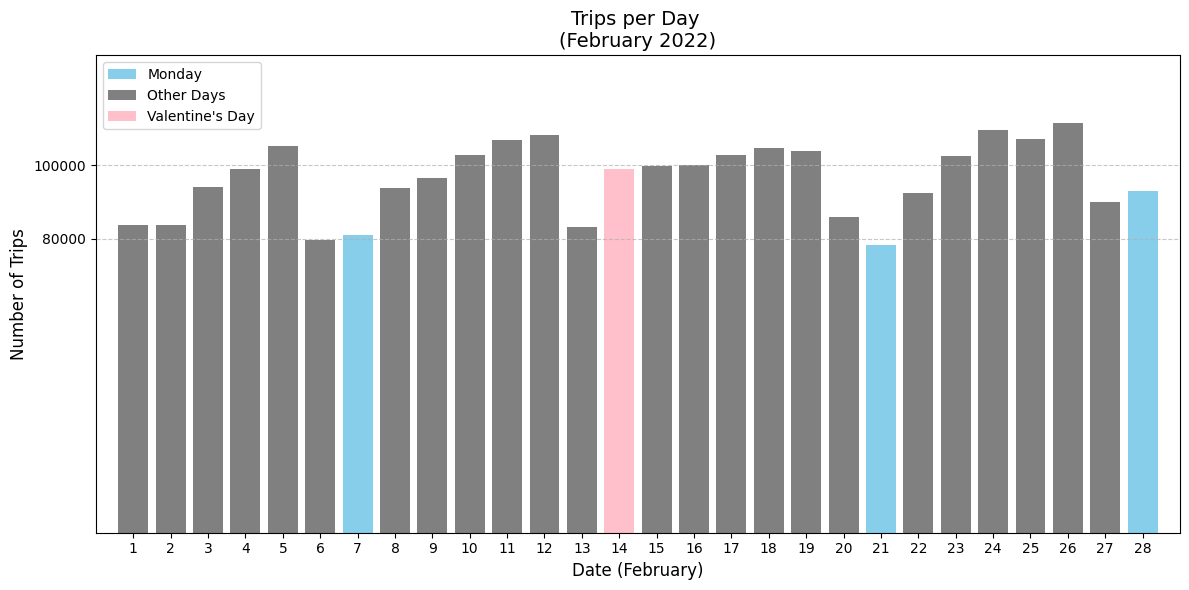

In [476]:
# Ensuring 'tpep_pickup_datetime' is set to datetime format
df_yellow_1['tpep_pickup_datetime'] = pd.to_datetime(df_yellow_1['tpep_pickup_datetime'], errors='coerce')

# Filter data to include only February
february_data = df_yellow_1[df_yellow_1['tpep_pickup_datetime'].dt.month == 2]

# Extract the date (without time) from 'tpep_pickup_datetime'
february_data['date'] = february_data['tpep_pickup_datetime'].dt.date

# Calculate the number of trips per day
daily_trip_counts = february_data.groupby('date').size()

# Create color mapping and labels for each date
colors = []
labels = []

for date in daily_trip_counts.index:
    if date.day == 14:
        colors.append('pink')  # February 14th is pink
        labels.append('Valentine\'s Day')  # Label for Valentine's Day
    elif pd.Timestamp(date).day_name() == 'Monday':
        colors.append('skyblue')  # Mondays are blue
        labels.append('Monday')  # Label for Monday
    else:
        colors.append('gray')  # Default color for other days
        labels.append('Other Days')  # Label for other days

# Visualization
plt.figure(figsize=(12, 6))

# Use a loop to plot each group with its label
unique_labels = list(set(labels))  # Find unique labels to avoid repetition in the legend
for label in unique_labels:
    indices = [i for i, l in enumerate(labels) if l == label]
    plt.bar(
        [date.day for date in daily_trip_counts.index[indices]],  # Only day numbers on the x-axis
        daily_trip_counts.values[indices], 
        color=colors[indices[0]],  # Color for this group
        label=label  # Add label
    )

# Set the x-axis and y-axis
plt.xlim(0, 29)
plt.ylim(0, 130000)

# Add specific y-ticks and gridlines
plt.yticks([80000, 100000])  # Only show ticks at 80000 and 100000
plt.grid(axis='y', which='both', linestyle='--', alpha=0.7)

# Add titles and axis labels
plt.title('Trips per Day \n(February 2022)', fontsize=14)
plt.xlabel('Date (February)', fontsize=12)
plt.ylabel('Number of Trips', fontsize=12)

# Adjust x-axis ticks
plt.xticks([x for x in range(0, 30) if x not in [0, 29]], rotation=0)  # Show 1 to 28, excluding 0 and 29

# Add legend
plt.legend()

# Adjust layout and show the graph
plt.tight_layout()
plt.show()


There seems to be more trips on this particular monday (14th feb) than other mondays in february. However, this can be attributed to the fact that the 14th feb is part of the New York Fashion Week (NYFW). Therefore, we will investigate, if there are more trips in the fashion week compared to the rest of Februrary.

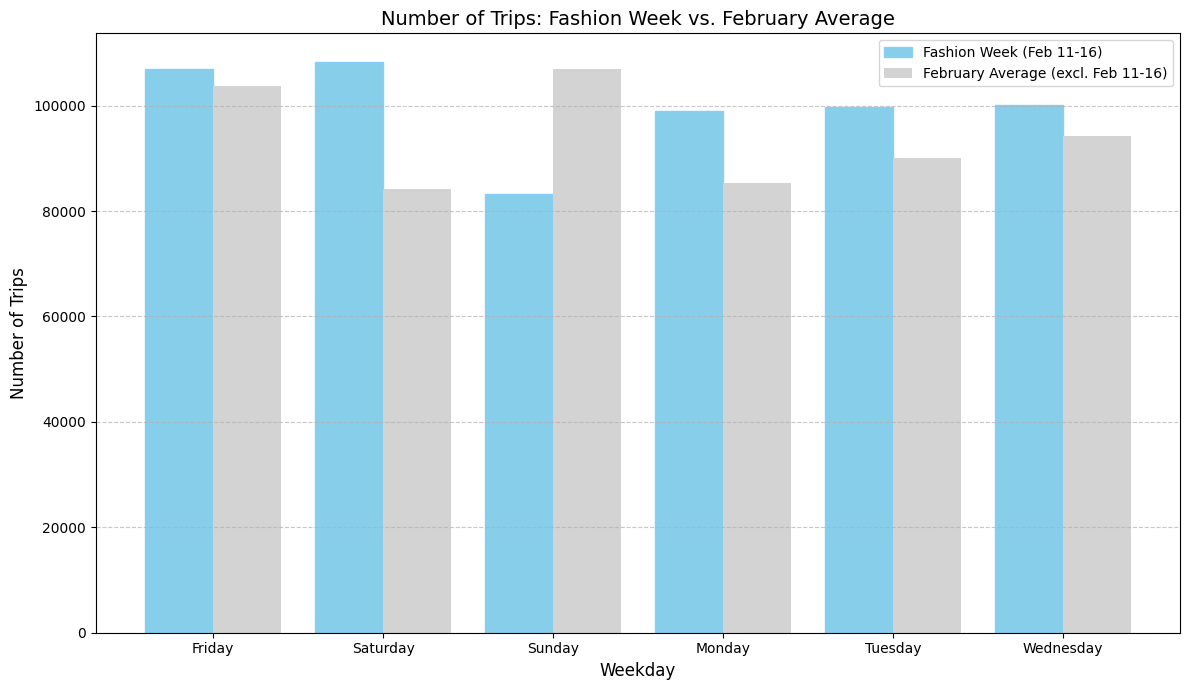

In [477]:
# Convert 'tpep_pickup_datetime' to datetime format
df_yellow_1['tpep_pickup_datetime'] = pd.to_datetime(df_yellow_1['tpep_pickup_datetime'])

# Add weekday as a column
df_yellow_1['weekday'] = df_yellow_1['tpep_pickup_datetime'].dt.day_name()

# Filter data for Fashion Week (February 11 to February 16)
fashion_week_data = df_yellow_1[
    (df_yellow_1['tpep_pickup_datetime'] >= '2022-02-11') &
    (df_yellow_1['tpep_pickup_datetime'] < '2022-02-17')
]

# Count the number of trips per weekday during Fashion Week
fashion_week_counts = fashion_week_data['weekday'].value_counts().reindex(
    ["Friday", "Saturday", "Sunday", "Monday", "Tuesday", "Wednesday"], fill_value=0
)

# Filter data for the entire month of February
feb_data = df_yellow_1[df_yellow_1['tpep_pickup_datetime'].dt.month == 2]

# Exclude Fashion Week dates
excluded_dates = feb_data[
    (feb_data['tpep_pickup_datetime'].dt.day >= 11) & 
    (feb_data['tpep_pickup_datetime'].dt.day <= 16)
].index
filtered_feb_data = feb_data.drop(excluded_dates)

# Count trips per weekday for February (excluding Fashion Week)
trips_by_weekday = filtered_feb_data['weekday'].value_counts().reindex(
    ["Friday", "Saturday", "Sunday", "Monday", "Tuesday", "Wednesday"], fill_value=0
)

# Number of each weekday in February 2022 (excluding Fashion Week)
days_in_february = {
    "Monday": 3,
    "Tuesday": 3,
    "Wednesday": 3,
    "Friday": 3,
    "Saturday": 3,
    "Sunday": 3
}

# Calculate average trips per weekday
average_trips_by_weekday = trips_by_weekday / pd.Series(days_in_february)

# Visualize data
fig, ax = plt.subplots(figsize=(12, 7))

# Bar width
bar_width = 0.4
x = range(len(fashion_week_counts.index))

# Bars for Fashion Week
ax.bar(
    [i - bar_width / 2 for i in x],
    fashion_week_counts.values,
    width=bar_width,
    color='skyblue',
    edgecolor='lightskyblue',
    label='Fashion Week (Feb 11-16)',
)

# Bars for February averages
ax.bar(
    [i + bar_width / 2 for i in x],
    average_trips_by_weekday.values,
    width=bar_width,
    color='lightgray',
    label='February Average (excl. Feb 11-16)'
)

# Titles and labels
ax.set_title('Number of Trips: Fashion Week vs. February Average', fontsize=14)
ax.set_xlabel('Weekday', fontsize=12)
ax.set_ylabel('Number of Trips', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(fashion_week_counts.index)
ax.legend()

# Gridlines and layout
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


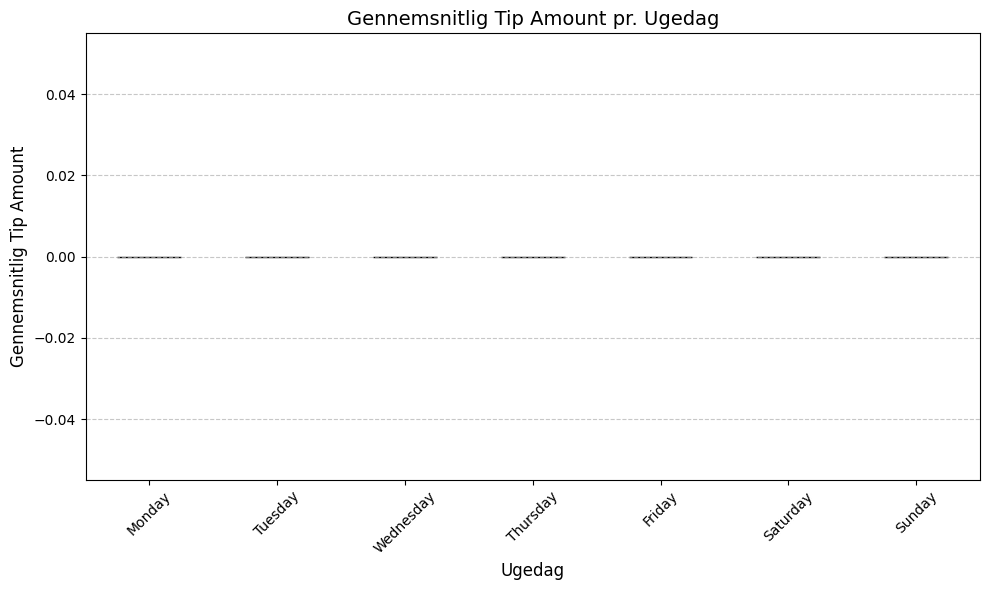

In [478]:
# Gruppér data efter ugedag og beregn gennemsnitlig tip_amount
average_tips_per_weekday = df_yellow_1.groupby('day_of_week')['tip_amount'].mean()

# Sorter ugedage i korrekt rækkefølge
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
average_tips_per_weekday = average_tips_per_weekday.reindex(weekday_order)

# Plot grafen
plt.figure(figsize=(10, 6))
average_tips_per_weekday.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Gennemsnitlig Tip Amount pr. Ugedag', fontsize=14)
plt.xlabel('Ugedag', fontsize=12)
plt.ylabel('Gennemsnitlig Tip Amount', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

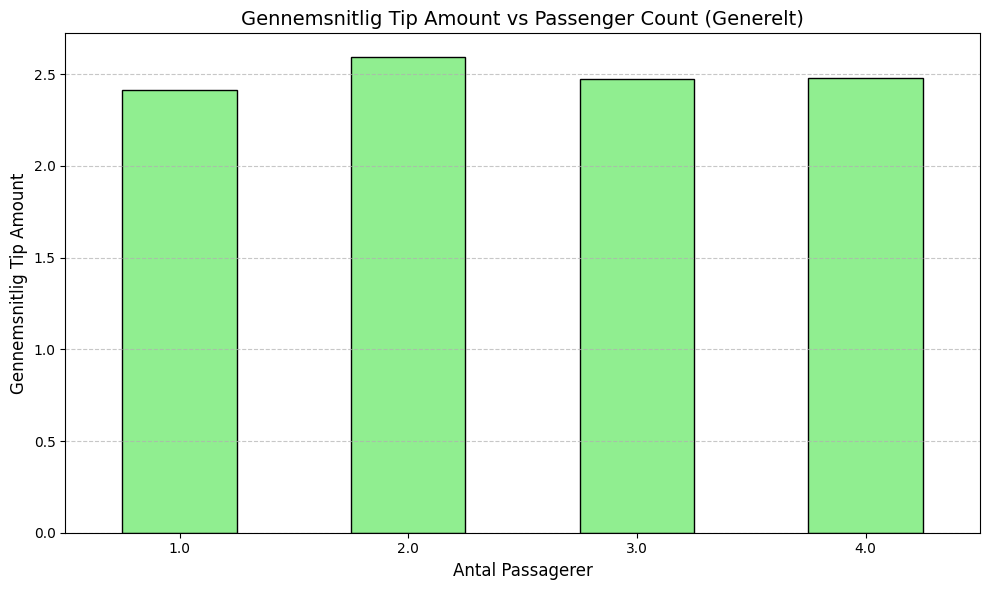

In [479]:
# Generelt gennemsnit af tip_amount i forhold til passenger_count
avg_tip_per_passenger = df_yellow_1.groupby('passenger_count')['tip_amount'].mean()

# Plot: Gennemsnitlig tip_amount vs passenger_count
plt.figure(figsize=(10, 6))
avg_tip_per_passenger.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Gennemsnitlig Tip Amount vs Passenger Count (Generelt)', fontsize=14)
plt.xlabel('Antal Passagerer', fontsize=12)
plt.ylabel('Gennemsnitlig Tip Amount', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [480]:
df_yellow_1.columns
df_yellow_1.sample()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
3892291         1  2022-02-15 10:52:19   2022-02-15 10:56:35              1.0   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
3892291            0.7         1.0                  N           163   

         DOLocationID  payment_type  ...  tip_amount  tolls_amount  \
3892291            50             1  ...         2.0           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  \
3892291                    0.3          10.3                   2.5   

         airport_fee  weekday  weekend_weekday  hour day_of_week  
3892291          0.0  Tuesday          Weekday    10           1  

[1 rows x 23 columns]

**Textbook Practice**: Use the principle "clutter is your enemy" to simplify your plots/graphs properly. Explain your motivation for each plot.

### Task 5: Time-Series Forecasting
Use Prophet or a similar tool to forecast the number of taxi rides in the future, respectively for green and yellow taxis. This includes creating a time-series model, tuning its parameters, and validating its performance. Also, interpret the model's predictions and identify the factors driving the forecasted trends.

A good example for using Prophet to do time-series forecasting can be found here https://www.kaggle.com/code/prashant111/tutorial-time-series-forecasting-with-prophet

**Modeling Details**:
Conduct parameter tuning for the forecasting model. Use cross-validation techniques appropriate for time series data, like time-based splitting.

**Evaluation Metrics**:
Specify which metrics will be used to evaluate the forecasting model, such as MAE (Mean Absolute Error), RMSE (Root Mean Square Error), or MAPE (Mean Absolute Percentage Error). Explain why these metrics are suitable (or not suitable) for the task.

**Visualization and Textbook Practice**: Plotting the forecasts against actual values to visually assess the model's performance. Creating a plot that shows how the forecast and confidence intervals change over time. You need to explain how the principles below are used for making this plot:
- "Choose an appropriate display" (Chapter 2)
- "Eliminate clutter" (Chapter 3)
- "Draw attention shere you want it" (Chapter 4)
- "Think like a designer" (Chapter 5)

**Hint**: In order to evaluate how your model performs, you need to split the dataset to be train and test. For time-series data, we cannot randomly select the data record (i.e. the rows) to be in train or test. Namely, all training data must be before the earliest test data. In other words, the model is always trained on historical data and then used to forecast the future.

In [481]:
# Write your code and markdowns

# Write your code or/and markdowns

# Kopiér dataen til sikker manipulation
df = df_yellow_1.copy()

# Konverter 'tpep_pickup_datetime' til datetime-format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Filtrér for månederne januar og februar
df = df[(df['tpep_pickup_datetime'] >= '2022-01-01') & (df['tpep_pickup_datetime'] < '2022-03-01')]

# Gruppér efter dato og tæl antallet af ture pr. dag
daily_rides = df.groupby(df['tpep_pickup_datetime'].dt.date).size().reset_index(name='y')

# Omdøb kolonnen for dato til 'ds' for Prophet
daily_rides.rename(columns={'tpep_pickup_datetime': 'ds'}, inplace=True)

# Konverter 'ds' til datetime-format
daily_rides['ds'] = pd.to_datetime(daily_rides['ds'])

# Sortér dataen efter dato
daily_rides = daily_rides.sort_values('ds')

# Tjek det klargjorte datasæt
print(daily_rides.head())

          ds      y
0 2022-01-01  57174
1 2022-01-02  53563
2 2022-01-03  66664
3 2022-01-04  68645
4 2022-01-05  68411


15:55:27 - cmdstanpy - INFO - Chain [1] start processing
15:55:27 - cmdstanpy - INFO - Chain [1] done processing


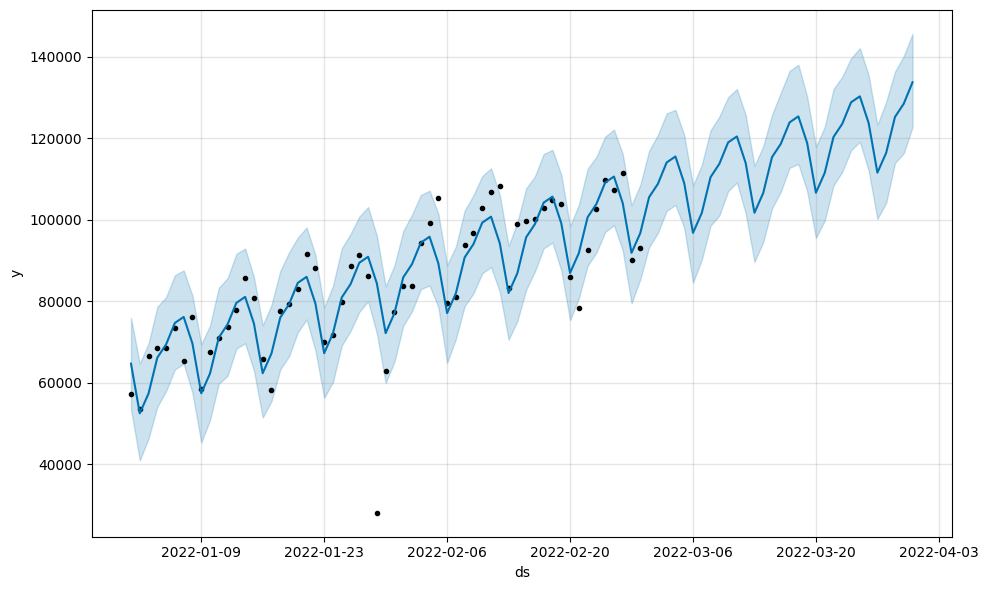

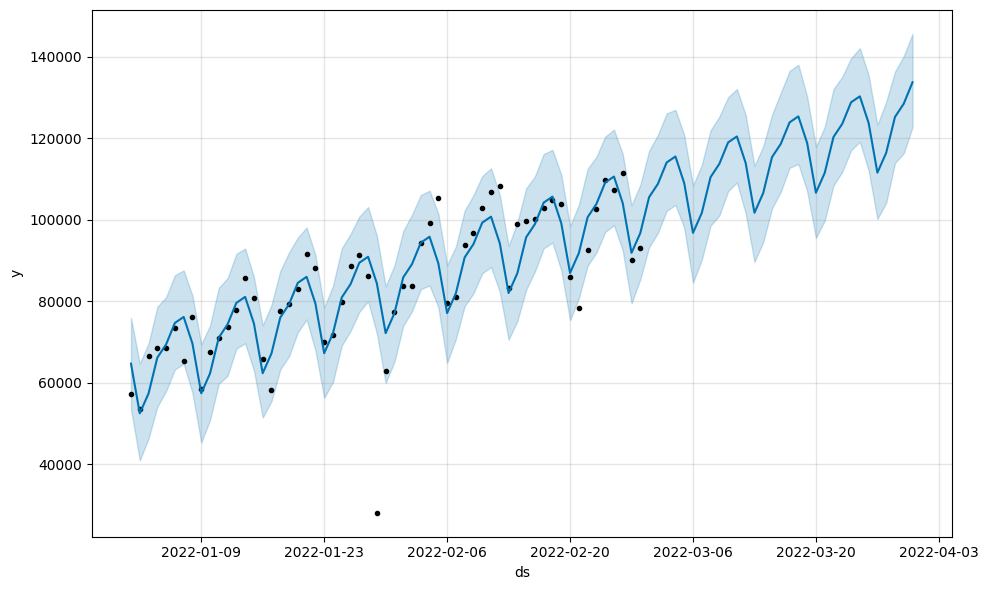

In [482]:
from prophet import Prophet

# Initialiser modellen
model = Prophet()

# Træn modellen på dataen
model.fit(daily_rides)

future = model.make_future_dataframe(periods=31)  # For 31 dage i marts

forecast = model.predict(future)

model.plot(forecast)


In [483]:

# Define the base URLs for the yellow and green taxi data
base_url_yellow = "https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_{year}-{month}.parquet"
base_url_green = "https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_{year}-{month}.parquet"

# Define the month and year for March
month = '03'
year = '2022'

# Download the data for March
df_yellow_march = pd.read_parquet(base_url_yellow.format(year=year, month=month))
df_green_march = pd.read_parquet(base_url_green.format(year=year, month=month))

# Display basic information about the March dataset
print("Yellow Taxi Data for March:")
print(df_yellow_march.info())
print(df_yellow_march.head())

print("\nGreen Taxi Data for March:")
print(df_green_march.info())
print(df_green_march.head())


Yellow Taxi Data for March:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3627882 entries, 0 to 3627881
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       

In [484]:
# Sammenlign Prophet's forudsigelser med faktiske data

# Gruppér marts-dataene efter dato og beregn antal ture pr. dag
df_yellow_march['tpep_pickup_datetime'] = pd.to_datetime(df_yellow_march['tpep_pickup_datetime'])
actual_march = df_yellow_march.groupby(df_yellow_march['tpep_pickup_datetime'].dt.date).size().reset_index(name='actual_rides')

# Omdøb kolonnen for dato
actual_march.rename(columns={'tpep_pickup_datetime': 'ds'}, inplace=True)

# Konverter 'ds' til datetime-format
actual_march['ds'] = pd.to_datetime(actual_march['ds'])

forecast_march = forecast[forecast['ds'].dt.month == 3][['ds', 'yhat']]
comparison = pd.merge(forecast_march, actual_march, on='ds', how='left')


In [485]:
# Sammenlign Prophet's forudsigelser med faktiske data
forecast_march = forecast[forecast['ds'].dt.month == 3][['ds', 'yhat']]
comparison = pd.merge(forecast_march, actual_march, on='ds', how='left')


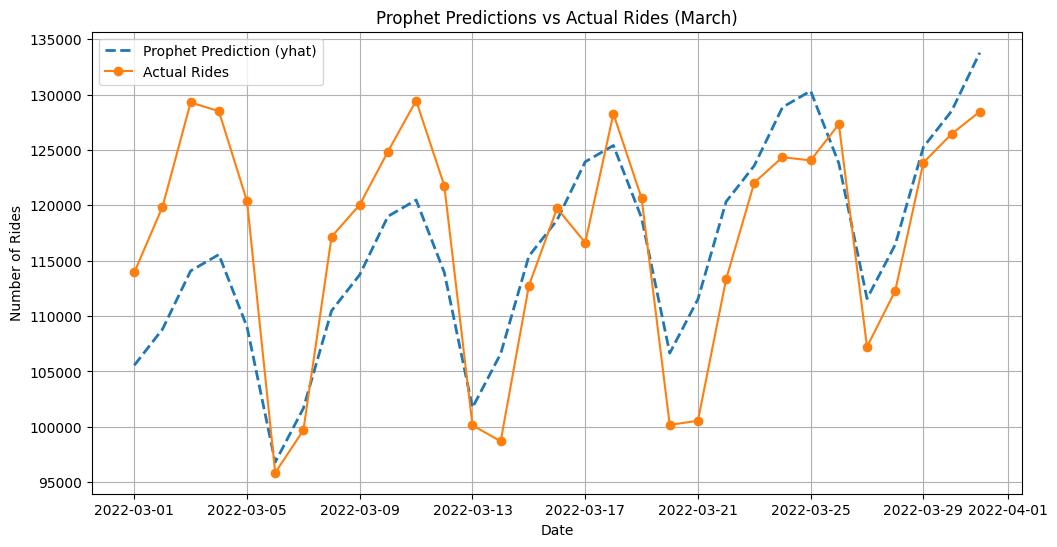

In [486]:
# Plot Prophet's forudsigelser og faktiske data
plt.figure(figsize=(12, 6))

# Prophet's forudsigelser
plt.plot(comparison['ds'], comparison['yhat'], label='Prophet Prediction (yhat)', linestyle='--', linewidth=2)

# Faktiske data
plt.plot(comparison['ds'], comparison['actual_rides'], label='Actual Rides', marker='o')

# Tilføj labels og titel
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.title('Prophet Predictions vs Actual Rides (March)')
plt.legend()
plt.grid(True)
plt.show()


The graph shows that the Prophet model performs well in capturing the overall trend, but it struggles to capture extreme variations and seasonal patterns. This may be due to insufficient parameter adjustments or a lack of external data. These observations can be used to further improve the model.

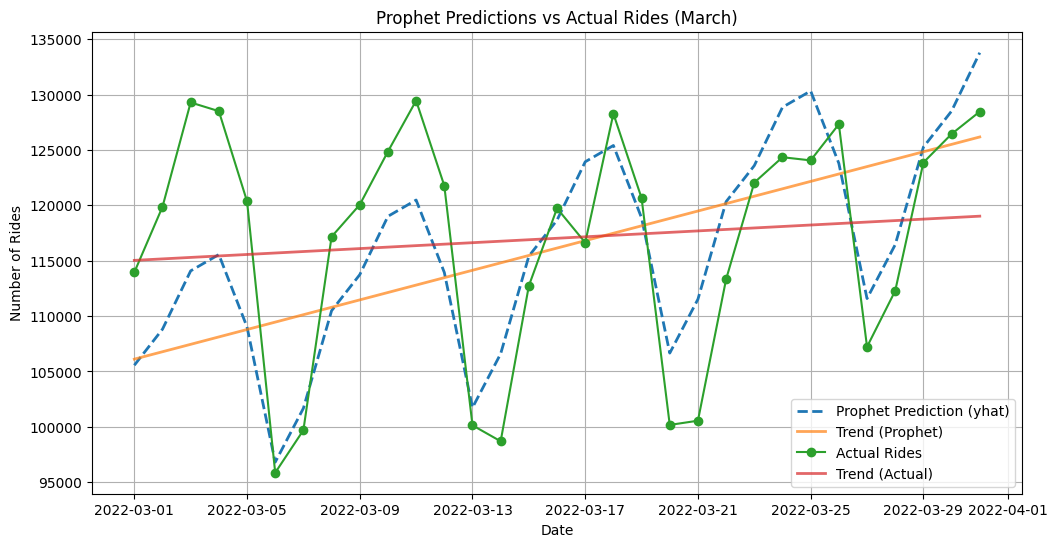

In [487]:
from sklearn.linear_model import LinearRegression

# Beregn trendlinje for Prophet's forudsigelser
x_prophet = np.array(range(len(comparison['ds']))).reshape(-1, 1)
y_prophet = comparison['yhat'].values
model_prophet = LinearRegression()
model_prophet.fit(x_prophet, y_prophet)
y_prophet_trend = model_prophet.predict(x_prophet)

# Beregn trendlinje for faktiske data
y_actual = comparison['actual_rides'].values
model_actual = LinearRegression()
model_actual.fit(x_prophet, y_actual)
y_actual_trend = model_actual.predict(x_prophet)

# Plot data og trendlinjer
plt.figure(figsize=(12, 6))

# Prophet's forudsigelser
plt.plot(comparison['ds'], comparison['yhat'], label='Prophet Prediction (yhat)', linestyle='--', linewidth=2)
plt.plot(comparison['ds'], y_prophet_trend, label='Trend (Prophet)', linestyle='-', linewidth=2, alpha=0.7)

# Faktiske data
plt.plot(comparison['ds'], comparison['actual_rides'], label='Actual Rides', marker='o')
plt.plot(comparison['ds'], y_actual_trend, label='Trend (Actual)', linestyle='-', linewidth=2, alpha=0.7)

# Tilføj labels og titel
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.title('Prophet Predictions vs Actual Rides (March)')
plt.legend()
plt.grid(True)
plt.show()


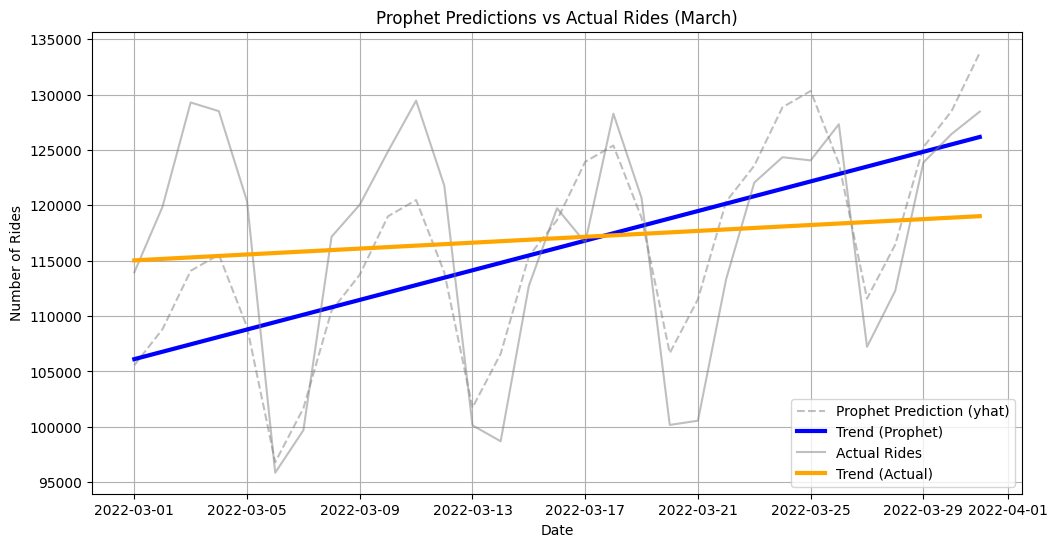

In [488]:
from sklearn.linear_model import LinearRegression

# Beregn trendlinje for Prophet's forudsigelser
x_prophet = np.array(range(len(comparison['ds']))).reshape(-1, 1)
y_prophet = comparison['yhat'].values
model_prophet = LinearRegression()
model_prophet.fit(x_prophet, y_prophet)
y_prophet_trend = model_prophet.predict(x_prophet)

# Beregn trendlinje for faktiske data
y_actual = comparison['actual_rides'].values
model_actual = LinearRegression()
model_actual.fit(x_prophet, y_actual)
y_actual_trend = model_actual.predict(x_prophet)

# Plot data og trendlinjer
plt.figure(figsize=(12, 6))

# Prophet's forudsigelser (gennemsigtige grå linjer)
plt.plot(comparison['ds'], comparison['yhat'], label='Prophet Prediction (yhat)', linestyle='--', linewidth=1.5, alpha=0.5, color='gray')
plt.plot(comparison['ds'], y_prophet_trend, label='Trend (Prophet)', linestyle='-', linewidth=3, color='blue')

# Faktiske data (gennemsigtige grå linjer)
plt.plot(comparison['ds'], comparison['actual_rides'], label='Actual Rides', linestyle='-', linewidth=1.5, alpha=0.5, color='gray')
plt.plot(comparison['ds'], y_actual_trend, label='Trend (Actual)', linestyle='-', linewidth=3, color='orange')

# Tilføj labels og titel
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.title('Prophet Predictions vs Actual Rides (March)')
plt.legend()
plt.grid(True)
plt.show()


The trendline for Martz appears to show a more positive trend than the actual situation. This is likely because the data is limited to just two months, January and February, with February possibly having significantly more taxi trips by chance. This pattern is also reflected in the AI predictions.

NameError: name 'slope_prophet_percent' is not defined

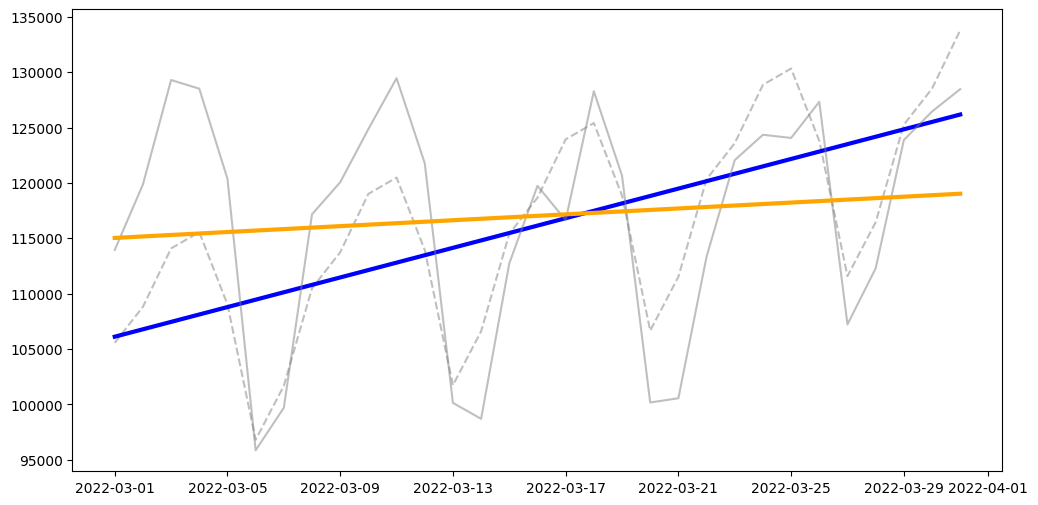

In [489]:
# Importer nødvendige biblioteker
# Plot data og trendlinjer
fig, ax = plt.subplots(figsize=(12, 6))  # Brug subplots for bedre kontrol

# Sæt baggrundsfarven til hvid
fig.patch.set_facecolor('white')  # Baggrundsfarve for hele figuren
ax.set_facecolor('white')  # Baggrundsfarve for aksen

# Prophet's forudsigelser (gennemsigtige grå linjer)
ax.plot(comparison['ds'], comparison['yhat'], label='Prediction', linestyle='--', linewidth=1.5, alpha=0.5, color='gray')
ax.plot(comparison['ds'], y_prophet_trend, label='Trend (Prediction)', linestyle='-', linewidth=3, color='blue')

# Faktiske data (gennemsigtige grå linjer)
ax.plot(comparison['ds'], comparison['actual_rides'], label='Actual Rides', linestyle='-', linewidth=1.5, alpha=0.5, color='gray')
ax.plot(comparison['ds'], y_actual_trend, label='Trend (Actual)', linestyle='-', linewidth=3, color='orange')

# Flyt hældningstekster til højre og under grafen med forskellig vertikal offset
x_text_position = comparison['ds'].iloc[len(comparison) // 2 + len(comparison) // 4]  # Flyttet mod højre
y_text_base = min(y_prophet_trend.min(), y_actual_trend.min()) - 0.05 * min(y_prophet_trend.min(), y_actual_trend.min())  # Lidt under grafen

# Prophet hældningstekst
ax.text(x_text_position, y_text_base + 24000, f'{slope_prophet_percent:.2f}%', 
        color='blue', fontsize=18, verticalalignment='center', horizontalalignment='left')

# Faktisk hældningstekst
ax.text(x_text_position, y_text_base + 16000, f'{slope_actual_percent:.2f}%',  # Flyttet nedad
        color='orange', fontsize=18, verticalalignment='center', horizontalalignment='left')

# Tilføj y-aksens etiket uden ticks
ax.set_ylabel('Number of Rides', fontsize=14)
ax.get_yaxis().set_ticks([])  # Skjul tallene på y-aksen

# Tilpas X-aksen
ax.set_xticks([comparison['ds'].iloc[0], comparison['ds'].iloc[-1]])  # Første og sidste dato
ax.set_xticklabels(['Start March', 'End March'])  # Tilpassede labels

# Tilføj pil på x-aksen
ax.annotate('', xy=(1, 0), xytext=(0, 0),
            xycoords='axes fraction', textcoords='axes fraction',
            arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))

# Tilføj pil på y-aksen
ax.annotate('', xy=(0, 1), xytext=(0, 0),
            xycoords='axes fraction', textcoords='axes fraction',
            arrowprops=dict(arrowstyle='->', lw=1.5, color='black'))

# Tilføj labels og titel
ax.set_title('Prophet Predictions vs Actual Rides (March)')
ax.legend()
ax.grid(True)
plt.show()


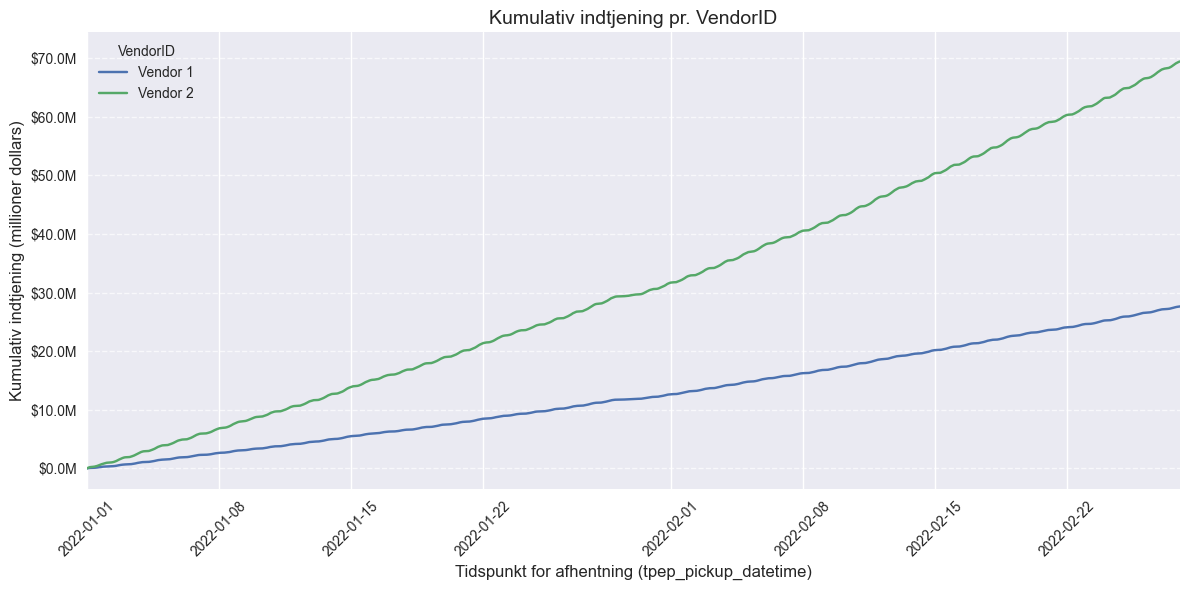

In [ ]:
import matplotlib.ticker as mticker

# Konverter dato-kolonnen til datetime
df_yellow_1['tpep_pickup_datetime'] = pd.to_datetime(df_yellow_1['tpep_pickup_datetime'], errors='coerce')

# Sørg for, at dataene er sorteret efter afhentningstidspunkt
df_yellow_1 = df_yellow_1.sort_values(by='tpep_pickup_datetime')

# Beregn kumulativ indtjening for hver VendorID
df_yellow_1['cumulative_total'] = df_yellow_1.groupby('VendorID')['total_amount'].cumsum()

# Plot kumulativ indtjening
plt.figure(figsize=(12, 6))

for vendor_id, group in df_yellow_1.groupby('VendorID'):
    plt.plot(group['tpep_pickup_datetime'], group['cumulative_total'], label=f"Vendor {vendor_id}")

# Tilføj titler og akseetiketter
plt.title("Kumulativ indtjening pr. VendorID", fontsize=14)
plt.xlabel("Tidspunkt for afhentning (tpep_pickup_datetime)", fontsize=12)
plt.ylabel("Kumulativ indtjening (millioner dollars)", fontsize=12)

# Juster y-aksen til at vise millioner dollars
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"${x / 1e6:.1f}M"))

# Juster x-aksen til at starte fra 1. januar 2022
plt.xlim(pd.Timestamp('2022-01-01'), pd.Timestamp('2022-02-28'))

# Roter x-aksen for bedre læsbarhed
plt.xticks(rotation=45)

# Tilføj gitter og legend
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="VendorID", fontsize=10)
plt.tight_layout()

# Vis grafen
plt.show()


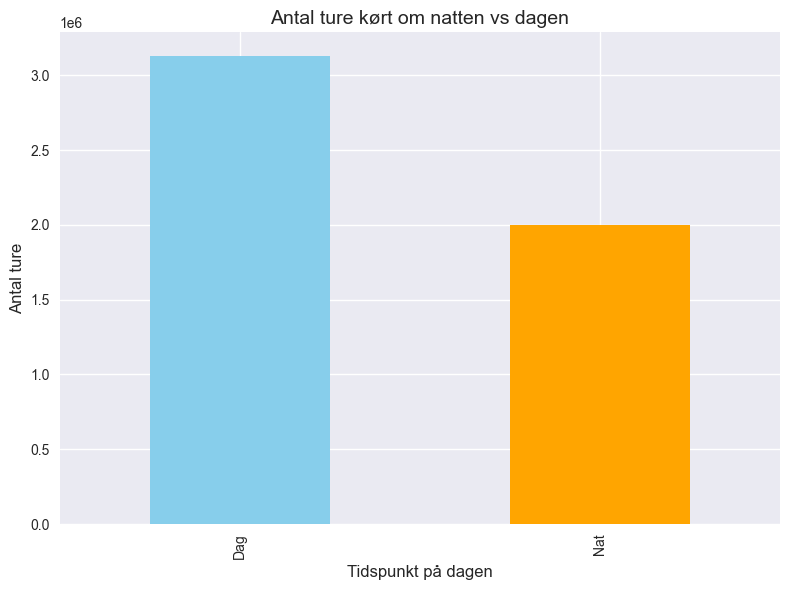

In [ ]:

# Antag at df_yellow_1 allerede er indlæst og har en kolonne 'tpep_pickup_datetime'

# Konverter dato-kolonnen til datetime, hvis det ikke allerede er gjort
df_yellow_1['tpep_pickup_datetime'] = pd.to_datetime(df_yellow_1['tpep_pickup_datetime'], errors='coerce')

# Opret en ny kolonne for dag/nat baseret på afhentningstidspunktet
df_yellow_1['time_of_day'] = df_yellow_1['tpep_pickup_datetime'].dt.hour.apply(
    lambda hour: 'Dag' if 6 <= hour < 18 else 'Nat'
)

# Beregn antallet af ture for hver kategori
time_of_day_counts = df_yellow_1['time_of_day'].value_counts()

# Plot resultaterne
plt.figure(figsize=(8, 6))
time_of_day_counts.plot(kind='bar', color=['skyblue', 'orange'])

# Tilføj titler og akseetiketter
plt.title("Antal ture kørt om natten vs dagen", fontsize=14)
plt.xlabel("Tidspunkt på dagen", fontsize=12)
plt.ylabel("Antal ture", fontsize=12)

# Vis grafen
plt.tight_layout()
plt.show()
